### тут углы тригоном окр

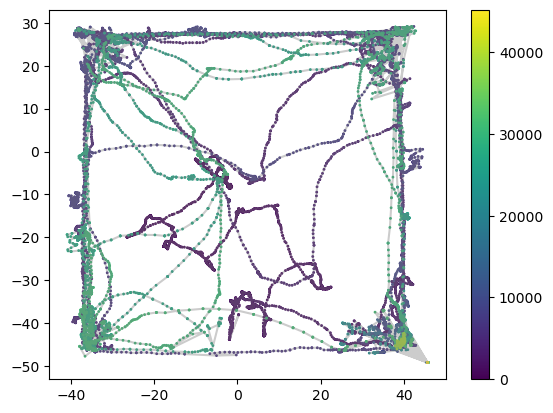

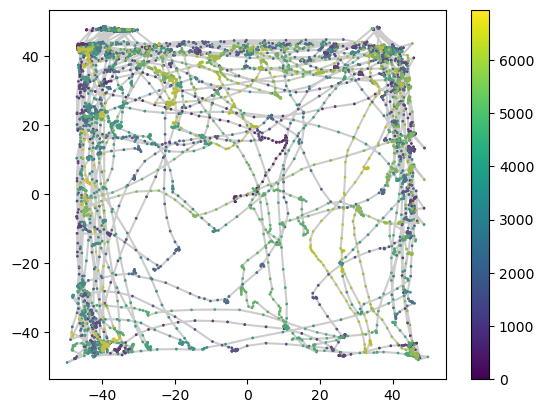

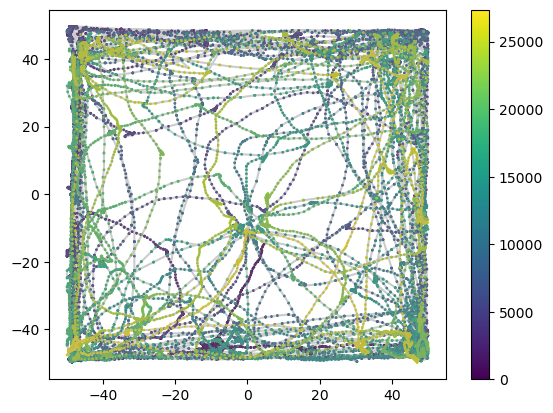

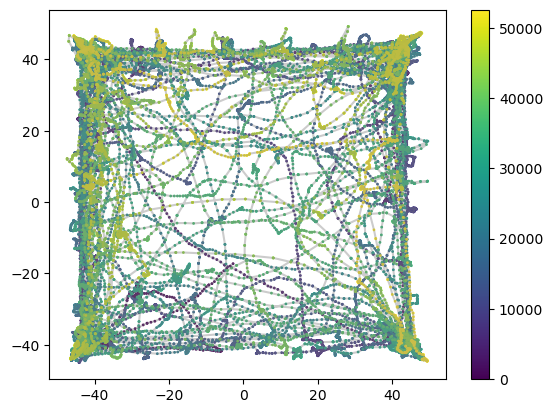

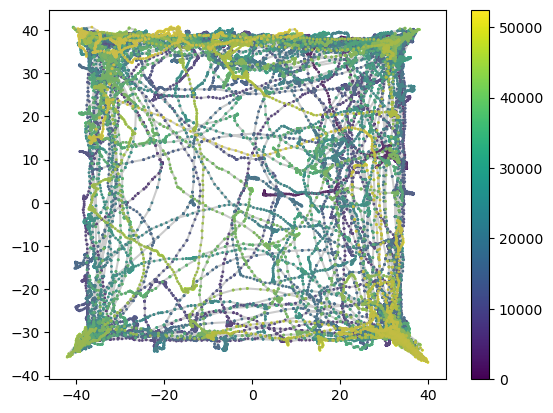

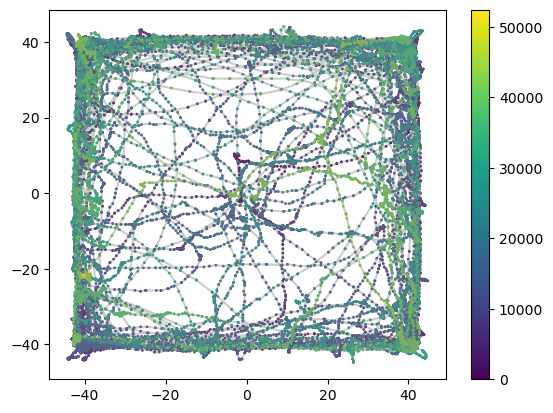

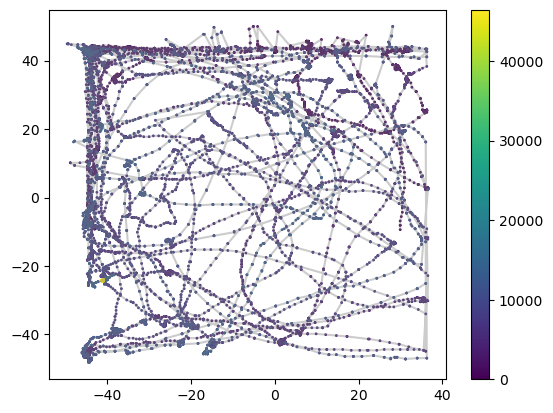

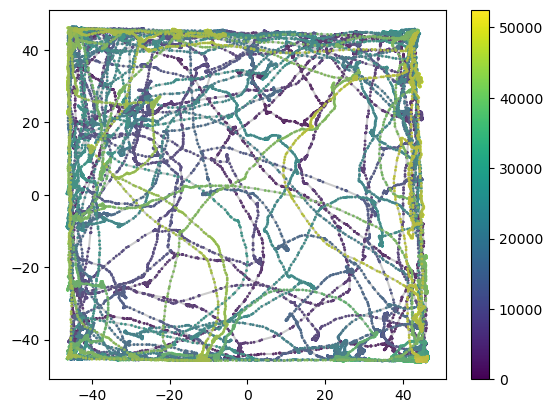

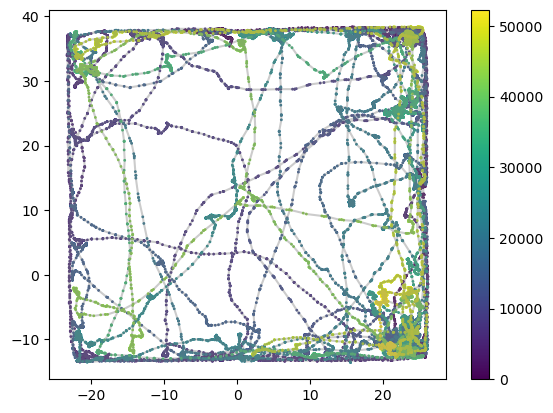

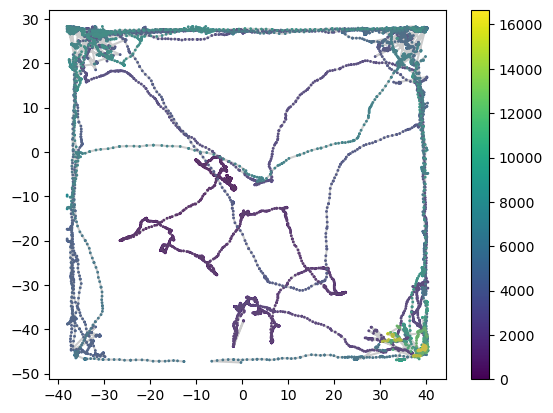

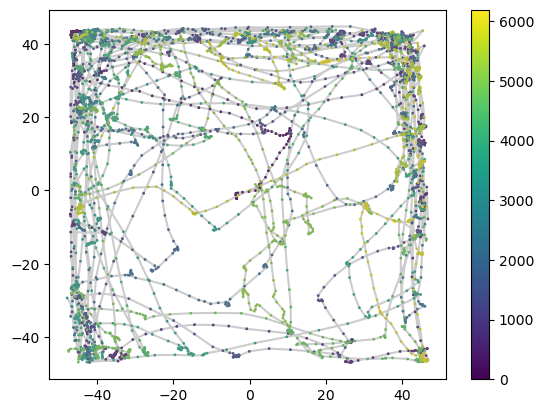

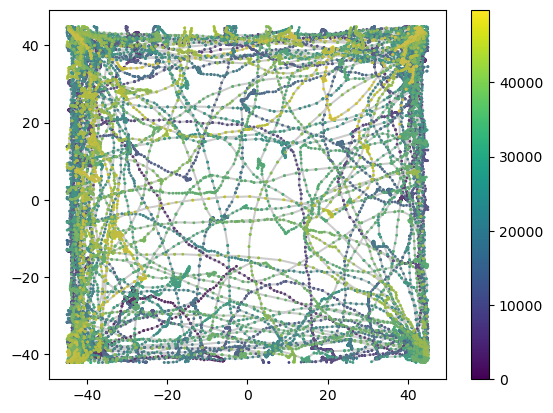

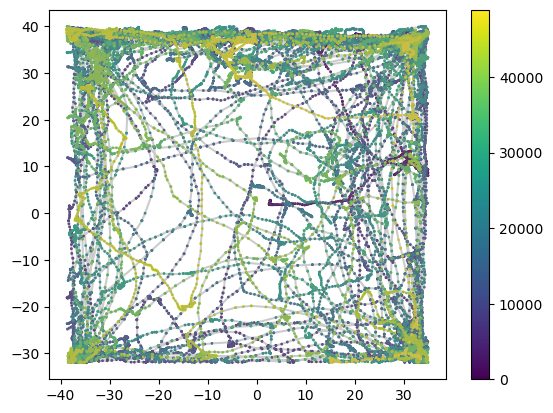

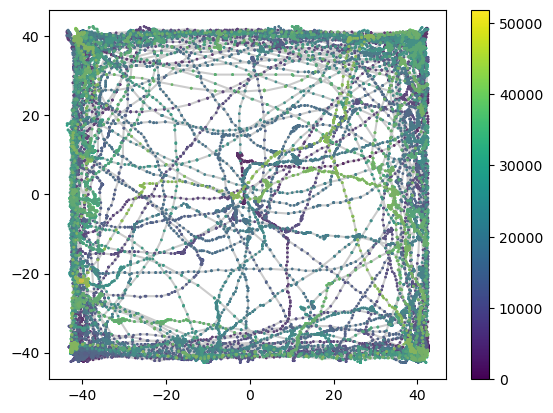

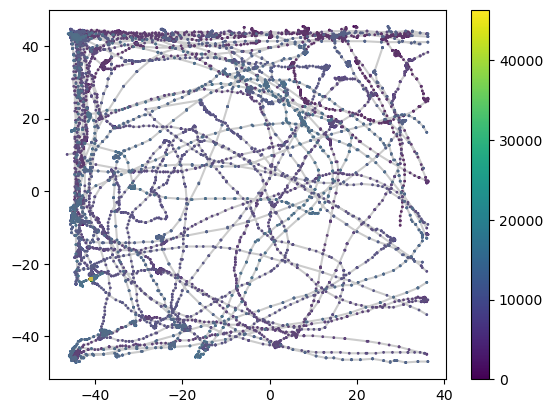

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d

import cv2

import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def plot_trajectory(x, y):
    time_cmap = np.arange(0, len(x))
    plt.scatter(x, y, s=1, c=time_cmap)
    plt.plot(x, y, c='gray', alpha=0.4)
    #plt.scatter(0, 0, marker='X', s=60, c='red')
    plt.colorbar()
    plt.show()

def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    plot_trajectory(df['x'],df['y'])
    return(df)

def cutjump(df, xmax, xmin, ymax, ymin):
    dff = df[(df['x'] < xmax) & (df['x'] > xmin) & (df['y'] < ymax) & (df['y'] > ymin)]
    ind = range(0, len(dff))
    dff = dff.reindex(ind)
    plot_trajectory(dff['x'], dff['y'])
    return dff



tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')

tr4 = cutjump(tr4, xmax=40.4, xmin=-38.1, ymax=28.3, ymin=-47.6)
tr3 = cutjump(tr3, xmax=46.8, xmin=-48, ymax=46, ymin=-47)
tr6 = cutjump(tr6, xmax=45, xmin=-45, ymax=45, ymin=-42.2)
tr7 = cutjump(tr7, xmax=35, xmin=-38.7, ymax=40, ymin=-32)
tr91 = cutjump(tr91, xmax=42.5, xmin=-43.7, ymax=42.5, ymin=-42.7)
tr92 = cutjump(tr92, xmax=36.3, xmin=-46.5, ymax=45.4, ymin=-47.3)

In [67]:
def addAngles(df):
    vx = []
    vy = []
    v = []
    ang = []
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            #vx.append(vvx)
            #vy.append(vvy)
            #v.append(vv)
            # угол
            #хз что делать с 0
            x = vvy/vvx
            if vvx >= 0:
                res = math.degrees(math.atan(x))
            else:
                res = 180 + math.degrees(math.atan(x))
            #убираем перевод в наглядную окружность. пусть остается тригонометрическая
            #if res <= 0:
                #res = -res + 90
                #вообще можно было бы записать и это как 360 - res + 90, т к лишние 360 и так вычитаются через пару строчек
            #elif res > 0:
                #res = 360 - res + 90
            if res >= 360:
                res -= 360
            ang.append(res)
            if i==1:
                ang.append(res)
    #df.insert(3, "Vx", vx)
    #df.insert(4, "Vy", vy)
    #df.insert(5, "V", v)
    df.insert(3, "angles", ang)
    #df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    #df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    #df['Vy'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

In [68]:
dfs = [tr1, tr2, tr3, tr4, tr5, tr6, tr7, tr91, tr92]
names = ['tr1','tr2','tr3','tr4','tr5','tr6','tr7', 'tr91','tr92']

for i in range(len(dfs)):
    print(dfs[i].isna().sum())
    dfs[i] = dfs[i].dropna()

time    0
x       0
y       0
dtype: int64
time    0
x       0
y       0
dtype: int64
time    730
x       730
y       730
dtype: int64
time    6994
x       6994
y       6994
dtype: int64
time    0
x       0
y       0
dtype: int64
time    2492
x       2492
y       2492
dtype: int64
time    2945
x       2945
y       2945
dtype: int64
time    588
x       588
y       588
dtype: int64
time    2278
x       2278
y       2278
dtype: int64


In [69]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)
    dfs[i] = addAngles(dfs[i])

for i in range(len(dfs)):
    dfs[i] = dfs[i].dropna()
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\299603410.py:23: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\

In [70]:
def returnStepsDFdeltaAng(df, dur):
    time_last = df['time'][0]
    ind_good = [0]
    for i in range(1, len(df)):
        if df['time'][i] - time_last >= dur:
            time_last = df['time'][i]
            ind_good.append(i)    
    df = df.iloc[ind_good]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    #delAng = [0] * len(df) - лучше не делать так, а то мы не увидим ошибки типа нанов
    delAng = [0]
    for i in range(1,len(df)):
        d = df['angles'][i]-df['angles'][i-1]
        if d > 180:
            d = d - 360
        if d < -180:
            d = d + 360
        delAng.append(d)
    df['delta_angle'] = delAng
    return df

In [71]:
#this cell is okay

dfs_step = {}
for i in range(len(dfs)):
    #print(len(dfs[i]))
    dfs_step[names[i]] = returnStepsDFdeltaAng(dfs[i], 0.5)
    #print(len(dfs_step[names[i]]))

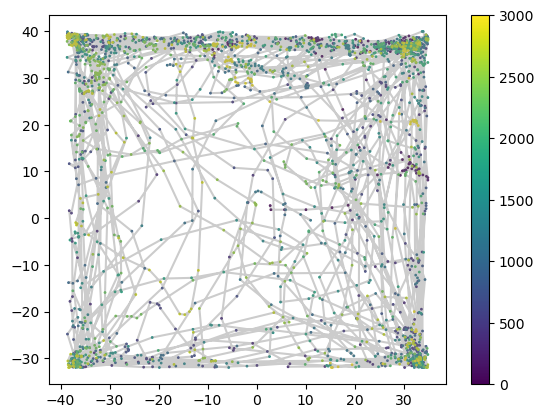

In [72]:
#посмотрим, что у нас вышло
#traja.plot(dfs_step['tr7'])
plot_trajectory(dfs_step['tr7']['x'], dfs_step['tr7']['y'])

In [73]:
bord_tr3 = {'xmi':tr3['x'].min(), 'xma': tr3['x'].max(), 'ymi':tr3['y'].min(), 'yma':tr3['y'].max()}
bord_tr4 = {'xmi':tr4['x'].min(), 'xma': tr4['x'].max(), 'ymi':tr4['y'].min(), 'yma':tr4['y'].max()}
bord_tr5 = {'xmi':tr5['x'].min(), 'xma': tr5['x'].max(), 'ymi':tr5['y'].min(), 'yma':tr5['y'].max()}
bord_tr6 = {'xmi':tr6['x'].min(), 'xma': tr6['x'].max(), 'ymi':tr6['y'].min(), 'yma':tr6['y'].max()}
bord_tr7 = {'xmi':tr7['x'].min(), 'xma': tr7['x'].max(), 'ymi':tr7['y'].min(), 'yma':tr7['y'].max()}
bord_tr91 = {'xmi':tr91['x'].min(), 'xma': tr91['x'].max(), 'ymi':tr91['y'].min(), 'yma':tr91['y'].max()}
bord_tr92 = {'xmi':tr92['x'].min(), 'xma': tr92['x'].max(), 'ymi':tr92['y'].min(), 'yma':tr92['y'].max()}
bord_tr1 = {'xmi':tr1['x'].min(), 'xma': tr1['x'].max(), 'ymi':tr1['y'].min(), 'yma':tr1['y'].max()}
bord_tr2 = {'xmi':tr2['x'].min(), 'xma': tr2['x'].max(), 'ymi':tr2['y'].min(), 'yma':tr2['y'].max()}


In [74]:
borders = {'tr1': bord_tr1, 'tr2': bord_tr2, 'tr3': bord_tr3, 'tr4': bord_tr4, 'tr5': bord_tr5, 'tr6': bord_tr6, 'tr7': bord_tr7,'tr91': bord_tr91,'tr92': bord_tr92}

In [75]:
#this cell is okay
def addNearWalls(trN, bord_trN):    
    trN['near_wall'] = 0
    ylength = bord_trN['yma'] - bord_trN['ymi'] 
    xlength = bord_trN['xma'] - bord_trN['xmi'] 
    xl = bord_trN['xmi']  + xlength * 0.1
    xr = bord_trN['xma']  - xlength * 0.1
    yd = bord_trN['ymi']  + ylength * 0.1
    yu = bord_trN['yma']  - ylength * 0.1
    
    for i in range(len(trN)):     
        if trN['x'].iloc[i] < xl:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 40
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 30
            else:
                trN['near_wall'].iloc[i] = 4
        elif trN['x'].iloc[i] > xr:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 10
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 20
            else:
                trN['near_wall'].iloc[i] = 2
        elif trN['y'].iloc[i] > yu:
            trN['near_wall'].iloc[i] = 1
        elif trN['y'].iloc[i] < yd:
            trN['near_wall'].iloc[i] = 3
    print(yd, yu)
    
    return trN

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Use

-37.053399999999996 37.1834


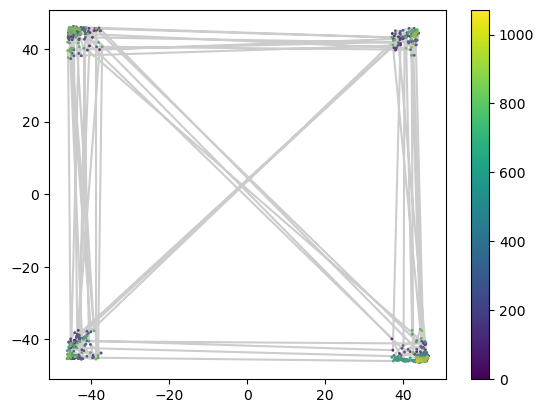

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Use

-8.364999999999998 33.235


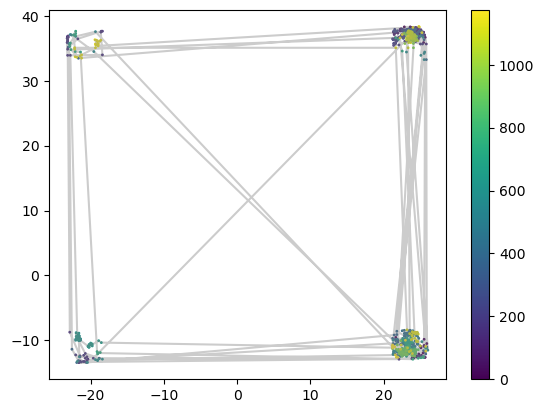

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 40
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Use

-37.7954 35.617399999999996


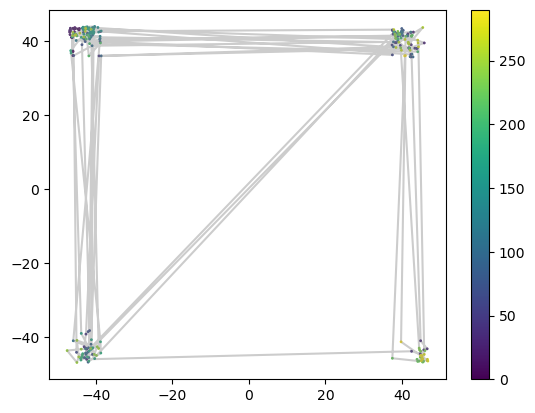

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Use

-39.9005 20.7195


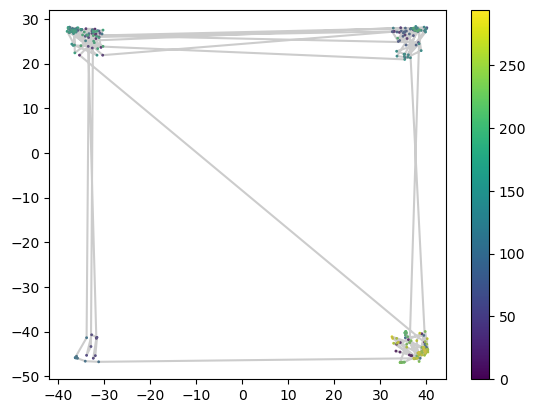

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 30
C:\Us

-39.8268 39.678799999999995


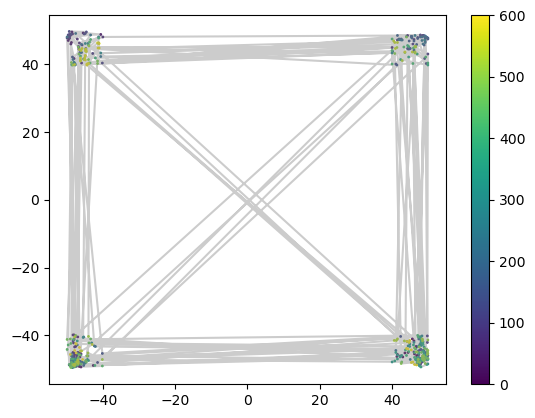

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 3
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 30
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Use

-33.4707 36.219699999999996


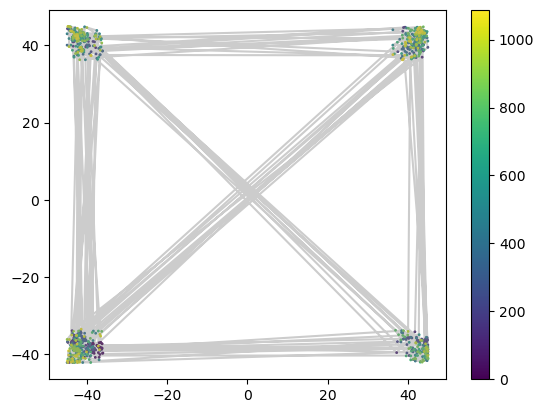

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Use

-24.753 32.775


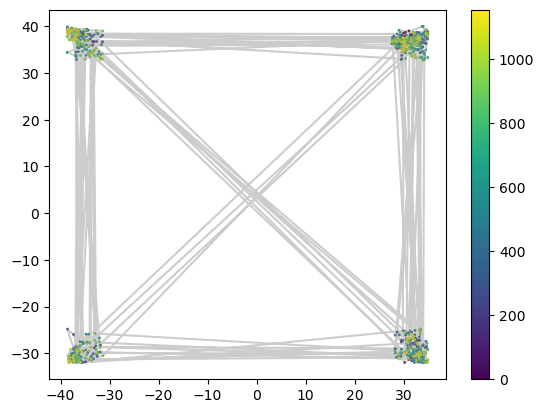

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 20
C:\Us

-33.9952 33.9952


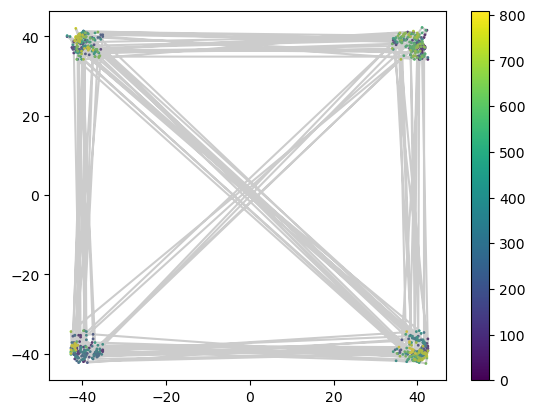

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4118556733.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Use

-37.9063 36.1313


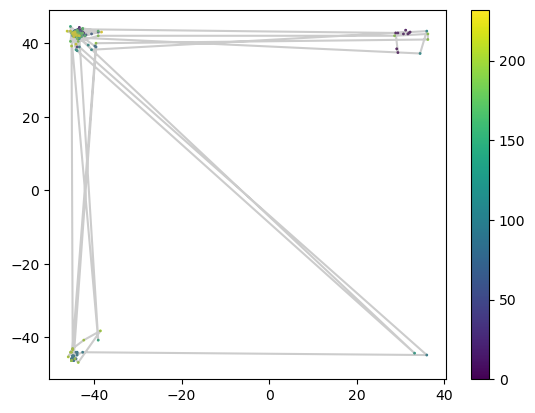

In [76]:
for i in dfs_step:
    dfs_step[i] = addNearWalls(dfs_step[i],borders[i])
    plot_trajectory(dfs_step[i].loc[dfs_step[i]['near_wall'] >= 10]['x'], dfs_step[i].loc[dfs_step[i]['near_wall'] >= 10]['y'])
    #traja.plot(dfs_step[i].loc[dfs_step[i]['near_wall'] >= 10])
    

In [77]:
dfs_step

{'tr1':           time       x       y      angles  delta_angle  near_wall
 0        1.068  -2.603  33.969  -63.434949     0.000000          0
 1        1.602   0.911  33.188   -9.450425    53.984524          0
 2        2.202   3.904  32.928    0.000000     9.450425          0
 3        2.703   2.213  33.448  135.000000   135.000000          0
 4        3.203   1.171  32.668  -68.198591   156.801409          0
 ...        ...     ...     ...         ...          ...        ...
 3044  1751.817  43.860 -45.943  -90.000000   -90.000000         20
 3045  1752.317  43.730 -45.943  180.000000   -90.000000         20
 3046  1753.285  43.730 -45.943  180.000000     0.000000         20
 3047  1753.819  43.991 -45.943    0.000000  -180.000000         20
 3048  1754.319  43.860 -45.943  180.000000   180.000000         20
 
 [3049 rows x 6 columns],
 'tr2':           time       x       y      angles  delta_angle  near_wall
 0       10.010  -1.021  35.371   75.963757     0.000000          1
 1    

##### давайте проверить какая длина шагов в разных зонах

In [78]:
def addStepLength(trN):    
    trN['step_length'] = 0
    for i in range(1, len(trN)):
        l = ((trN['x'].iloc[i] - trN['x'].iloc[i-1]) ** 2 + (trN['y'].iloc[i] - trN['y'].iloc[i-1]) ** 2) ** 0.5
        trN['step_length'].iloc[i] = l
    
    return trN

In [79]:
for i in dfs_step:
    dfs_step[i] = addStepLength(dfs_step[i])
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\1782672783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['step_length'].iloc[i] = l
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\1782672783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['step_length'].iloc[i] = l
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\1782672783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['step_length'].iloc[i] = l
C:\U

#### Вычислим среднюю длину шагов. Это НЕ нужно для того чтобы строить распределения углов

In [80]:
cornMean = []
wallMean = []
centMean = []
for i in dfs_step:
    df = dfs_step[i]
    co = df.loc[df['near_wall']>=10]['step_length'].mean()
    w = df.loc[(df['near_wall']>=1) & (df['near_wall']<=4)]['step_length'].mean()
    ce = df.loc[(df['near_wall']==0) & (df['near_wall']==0)]['step_length'].mean()
    cornMean.append(co)
    centMean.append(ce)
    wallMean.append(w)
    

In [81]:
for i in cornMean:
    print(i)

1.0662234952755074
0.5200364076191811
2.8983343687172956
2.2469028522817975
3.8111306693571776
2.550809298387065
1.7367657753487742
2.4321883151769677
2.057394414535499


In [82]:
for i in centMean:
    print(i)

5.865621770839038
2.412504463601352
7.151027676809649
3.270158375990965
10.81991280877006
7.38406213006336
6.911544607500937
8.418673388558842
10.174901743518799


In [83]:
for i in wallMean:
    print(i)

3.5452797425442553
1.3895374558909963
4.849628743315988
5.088213126260652
10.157339944913872
5.06952477473764
3.9876193487352047
5.17009024383969
1.2164791372982018


In [84]:
df = dfs_step['tr1']
print(df.loc[df['near_wall']>=10]['step_length'].mean())
print(df.loc[df['near_wall']>=10]['step_length'].median())

1.0662234952755074
0.2906888370749784


####  Проверим зависимость изменения угла от угла (в разных зонах)

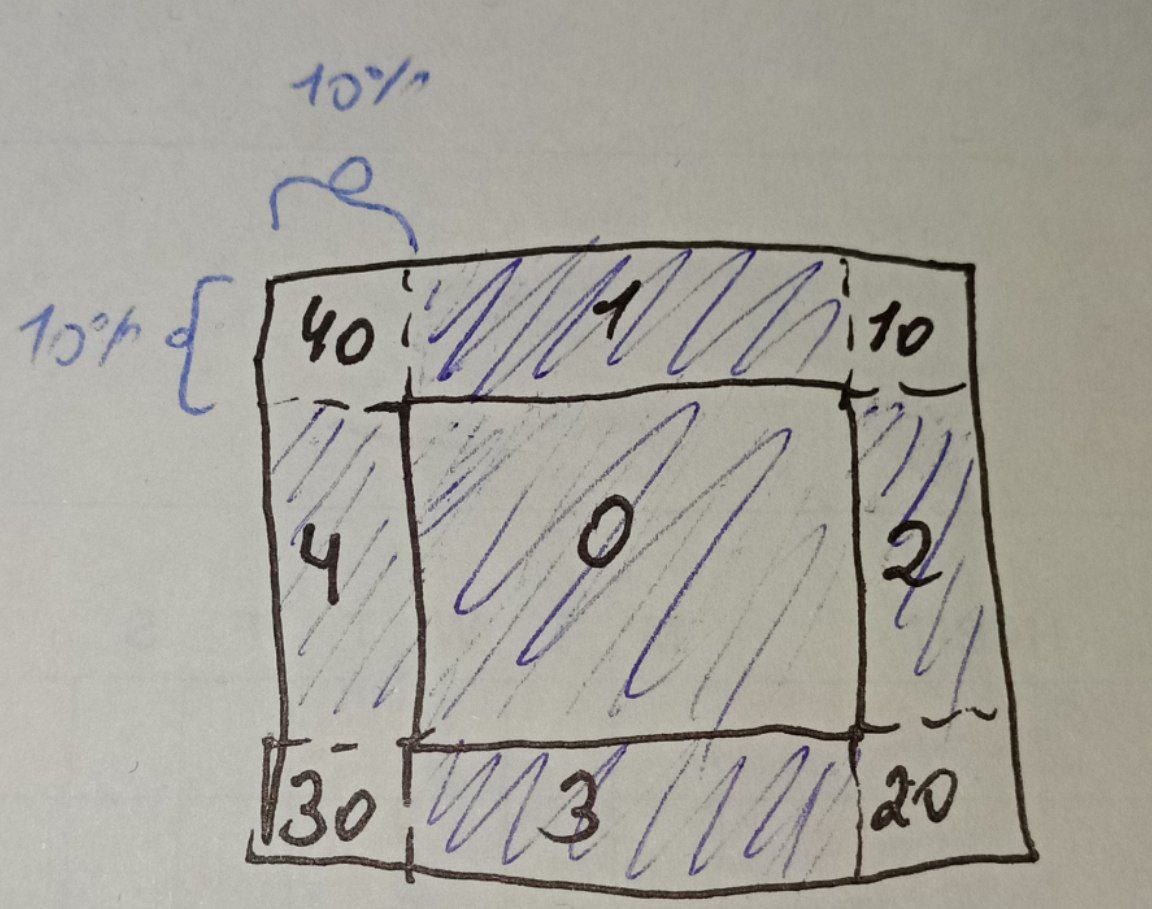

In [85]:
DfsStep13 = {}
DfsStep24 = {}
for i in dfs_step:
    df = dfs_step[i]
    DfsStep13[i] = df.loc[(df['near_wall']==1) | (df['near_wall']==3)]
    DfsStep13[i] = DfsStep13[i].reset_index()
    DfsStep13[i] = DfsStep13[i].drop(['index'], axis=1)
    DfsStep24[i] = df.loc[(df['near_wall']==2) | (df['near_wall']==4)]
    DfsStep24[i] = DfsStep24[i].reset_index()
    DfsStep24[i] = DfsStep24[i].drop(['index'], axis=1)

<Figure size 640x480 with 0 Axes>

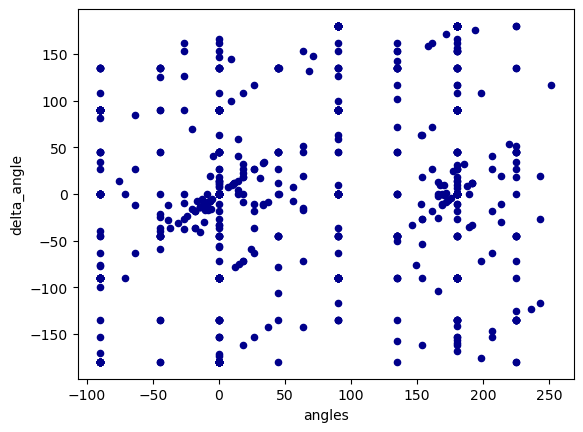

<Figure size 640x480 with 0 Axes>

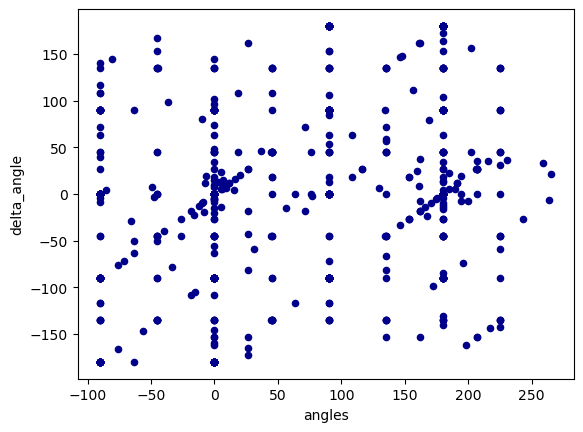

<Figure size 640x480 with 0 Axes>

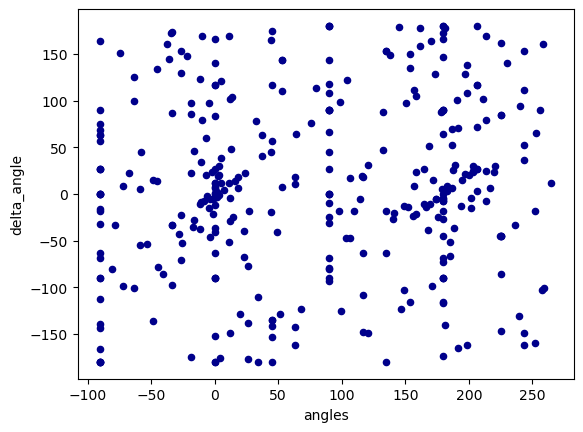

<Figure size 640x480 with 0 Axes>

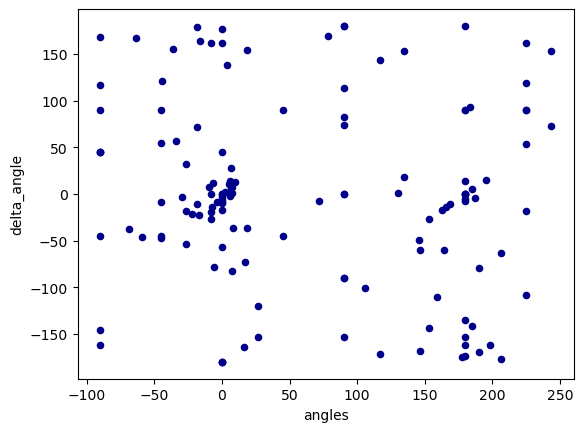

<Figure size 640x480 with 0 Axes>

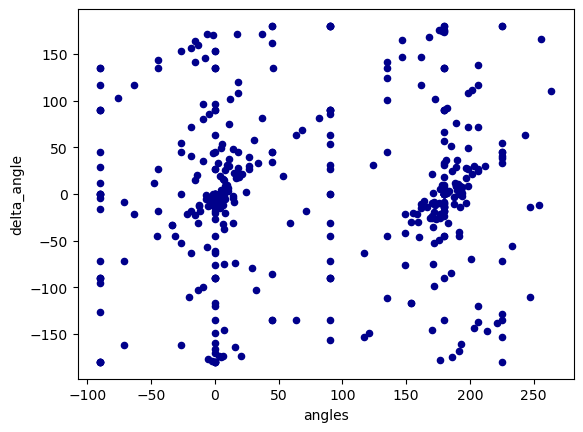

<Figure size 640x480 with 0 Axes>

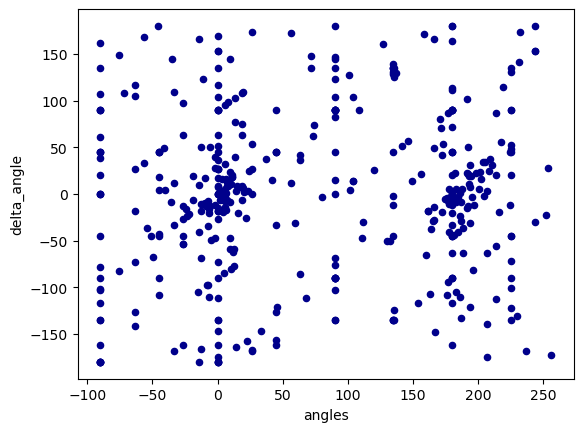

<Figure size 640x480 with 0 Axes>

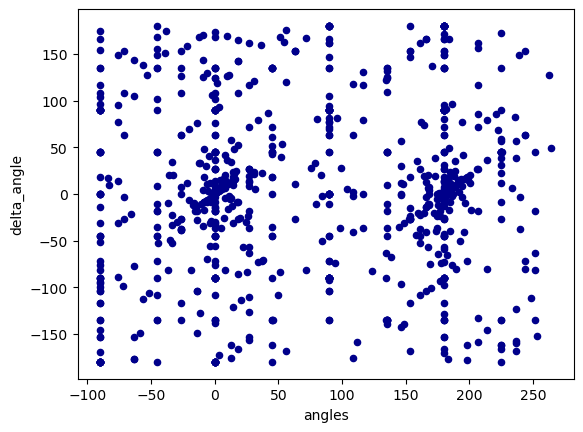

<Figure size 640x480 with 0 Axes>

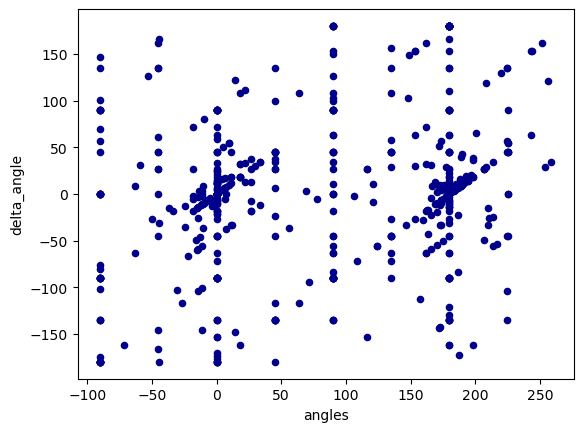

<Figure size 640x480 with 0 Axes>

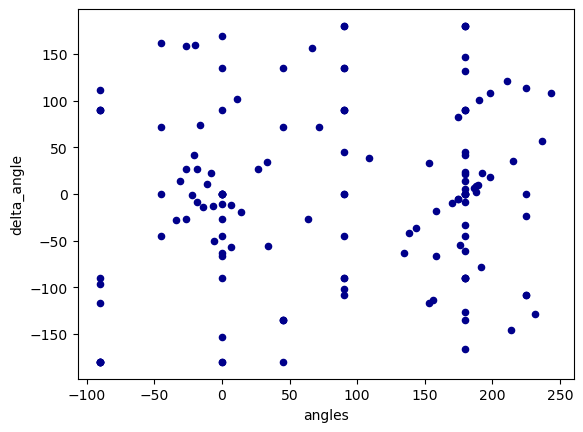

In [86]:
#в зонах 1 и 3
for i in DfsStep13:
    plt.figure()
    DfsStep13[i].plot.scatter(x='angles',y='delta_angle', c='DarkBlue')
    plt.show()

<Figure size 640x480 with 0 Axes>

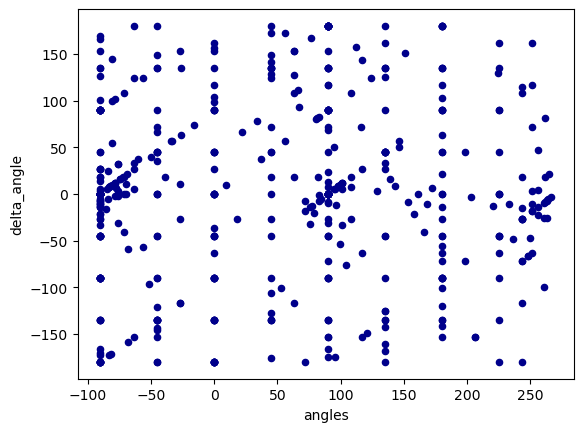

<Figure size 640x480 with 0 Axes>

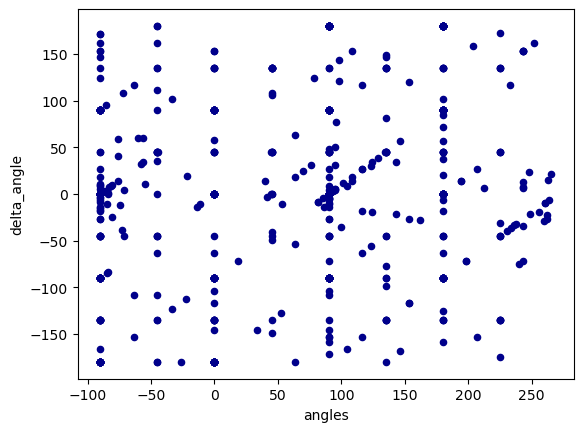

<Figure size 640x480 with 0 Axes>

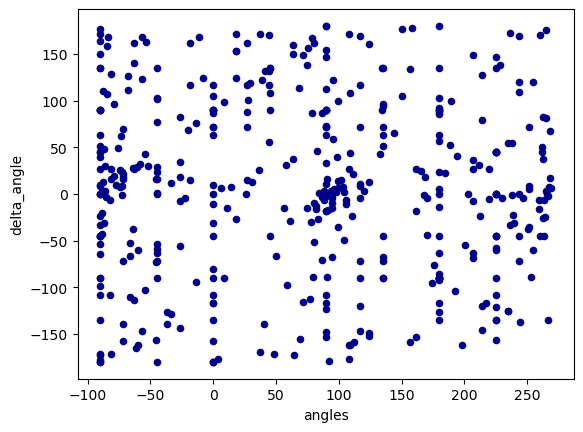

<Figure size 640x480 with 0 Axes>

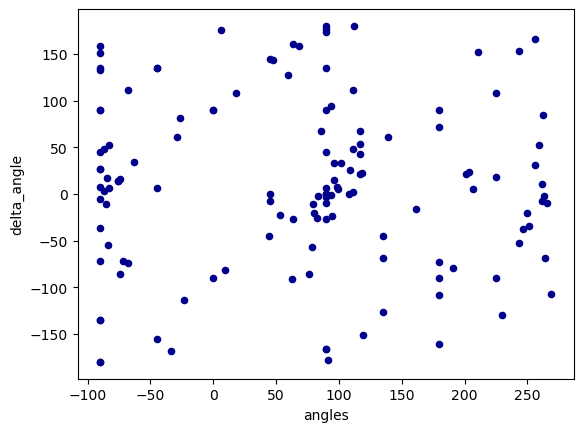

<Figure size 640x480 with 0 Axes>

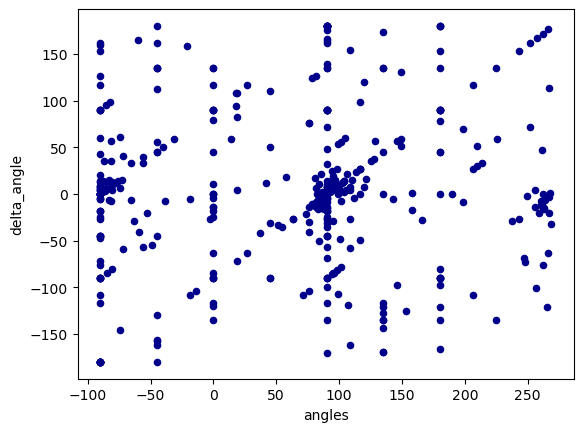

<Figure size 640x480 with 0 Axes>

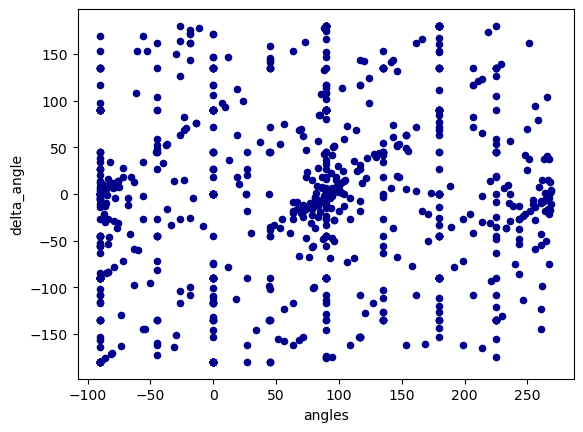

<Figure size 640x480 with 0 Axes>

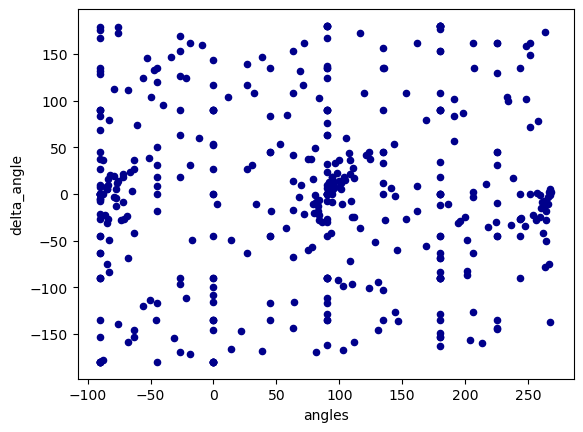

<Figure size 640x480 with 0 Axes>

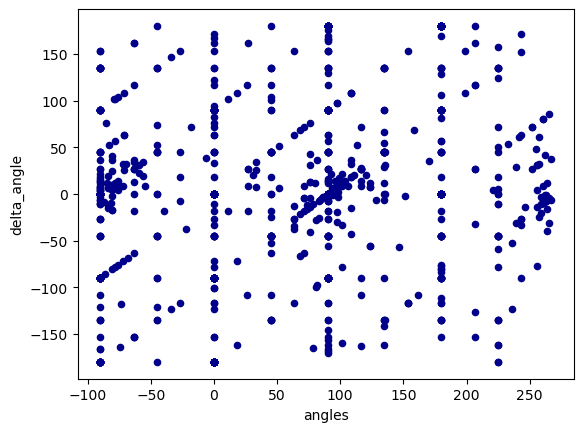

<Figure size 640x480 with 0 Axes>

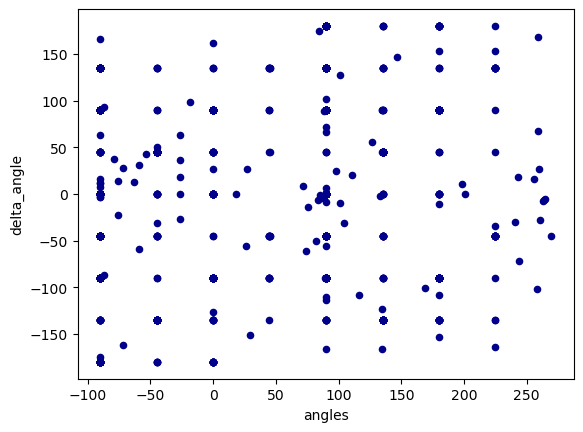

In [87]:
#в зонах 2 и 4
for i in DfsStep24:
    plt.figure()
    DfsStep24[i].plot.scatter(x='angles',y='delta_angle', c='DarkBlue')
    plt.show()

DfsStep1[i].plot.scatter(x='angles',y='delta_angle', c='darkblue')

<Figure size 640x480 with 0 Axes>

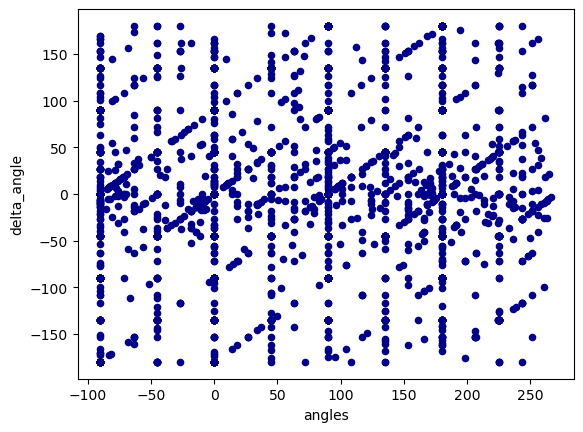

<Figure size 640x480 with 0 Axes>

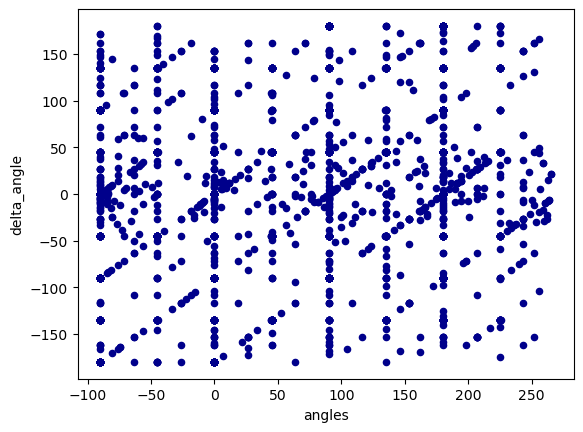

<Figure size 640x480 with 0 Axes>

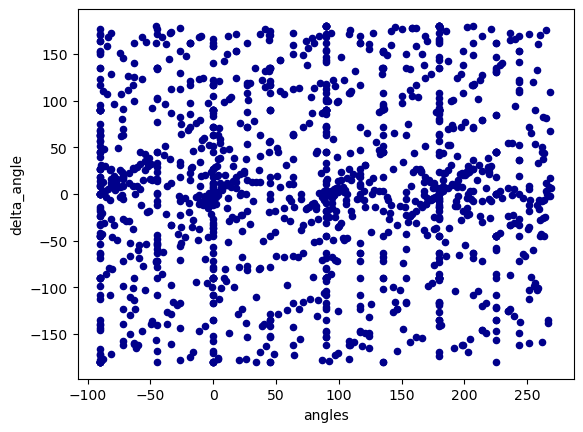

<Figure size 640x480 with 0 Axes>

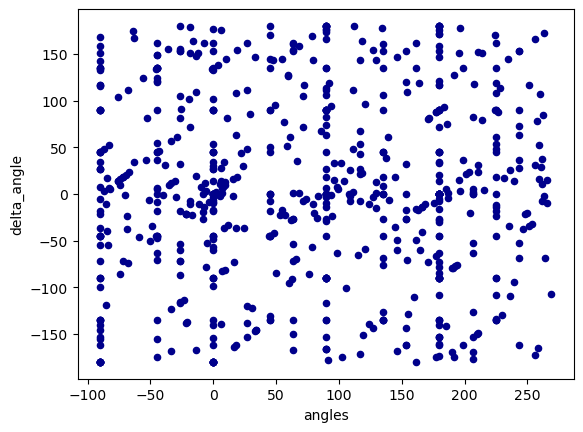

<Figure size 640x480 with 0 Axes>

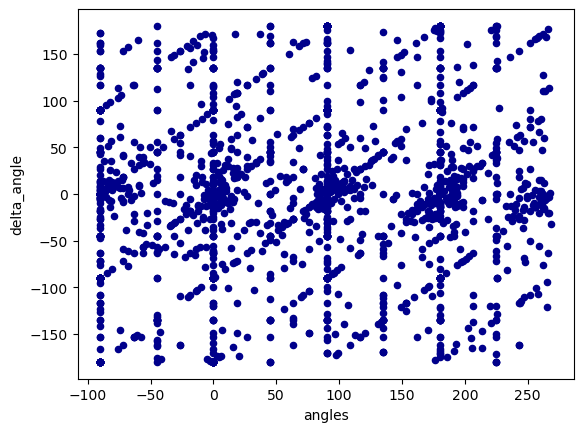

<Figure size 640x480 with 0 Axes>

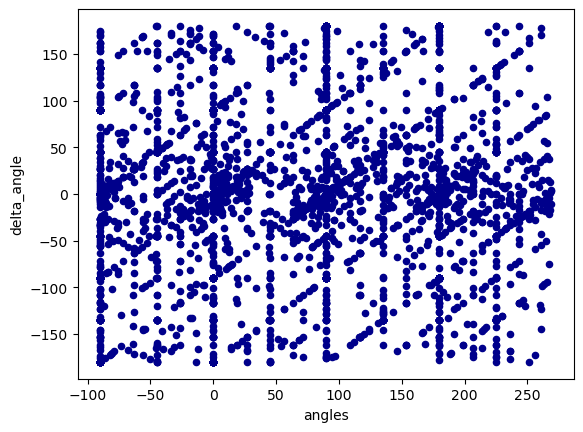

<Figure size 640x480 with 0 Axes>

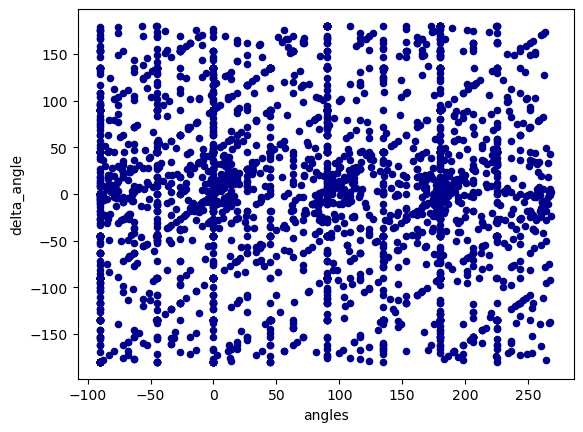

<Figure size 640x480 with 0 Axes>

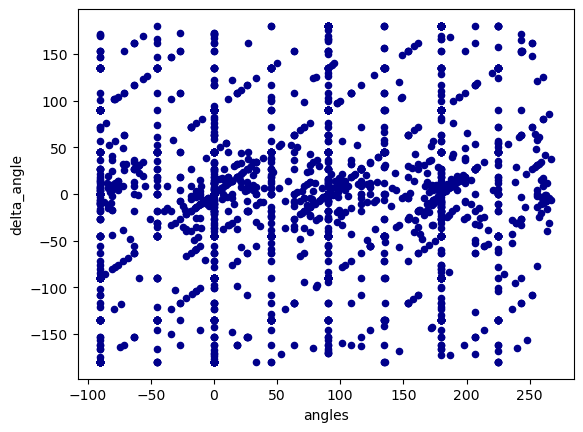

<Figure size 640x480 with 0 Axes>

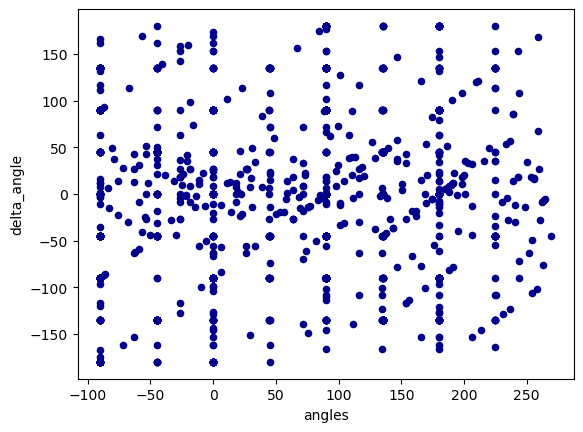

In [88]:
#во всех зонах
for i in dfs_step:
    plt.figure()
    dfs_step[i].plot.scatter(x='angles',y='delta_angle', c='DarkBlue')
    plt.show()

In [89]:
DfsStep1 = {}
DfsStep2 = {}
DfsStep3 = {}
DfsStep4 = {}
for i in dfs_step:
    df = dfs_step[i]
    DfsStep1[i] = df.loc[df['near_wall']==1]
    DfsStep1[i] = DfsStep1[i].reset_index()
    DfsStep1[i] = DfsStep1[i].drop(['index'], axis=1)
    DfsStep2[i] = df.loc[df['near_wall']==2]
    DfsStep2[i] = DfsStep2[i].reset_index()
    DfsStep2[i] = DfsStep2[i].drop(['index'], axis=1)
    DfsStep3[i] = df.loc[df['near_wall']==3]
    DfsStep3[i] = DfsStep3[i].reset_index()
    DfsStep3[i] = DfsStep3[i].drop(['index'], axis=1)
    DfsStep4[i] = df.loc[df['near_wall']==4]
    DfsStep4[i] = DfsStep4[i].reset_index()
    DfsStep4[i] = DfsStep4[i].drop(['index'], axis=1)

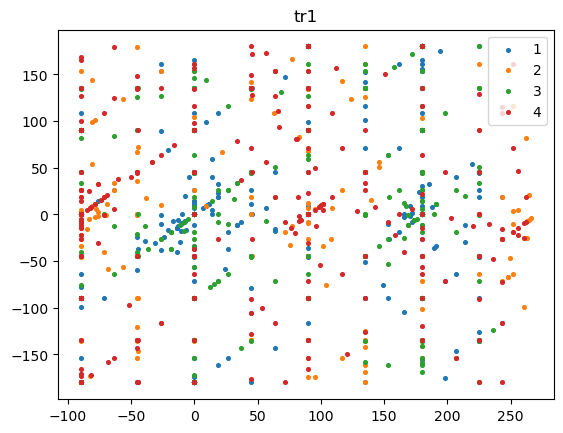

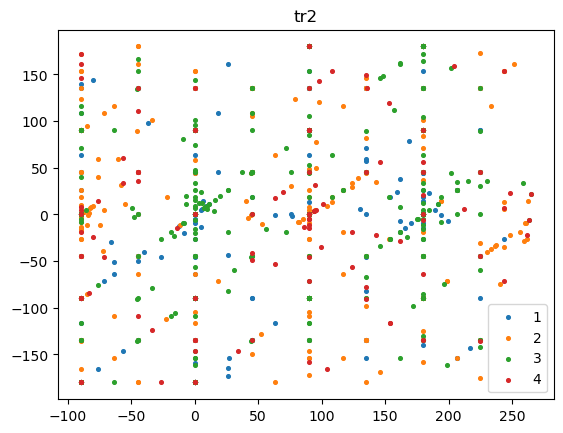

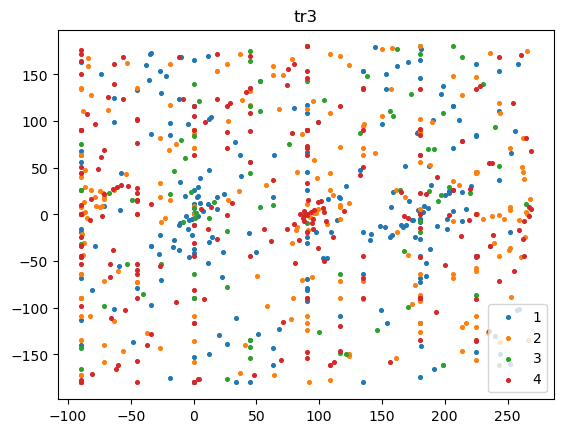

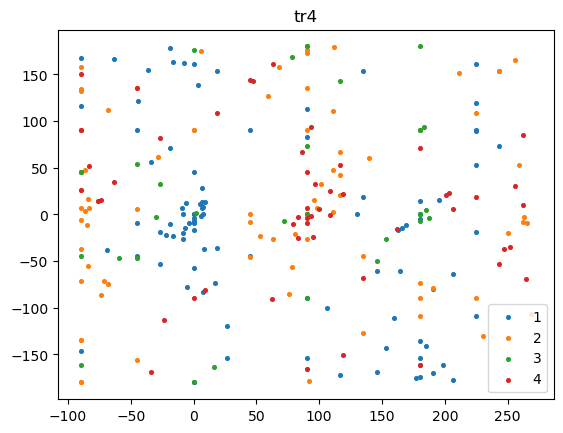

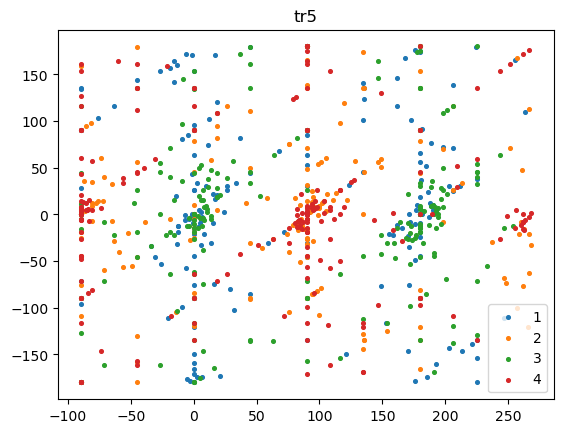

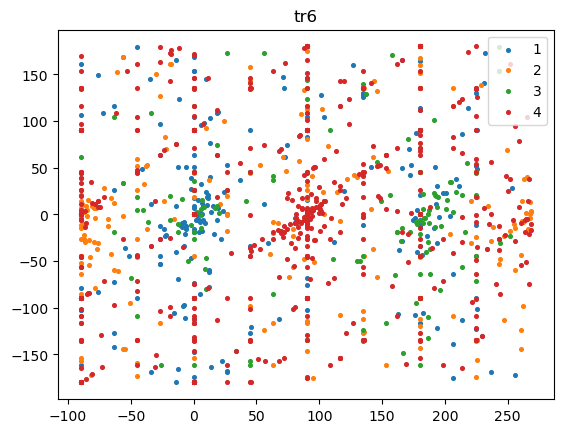

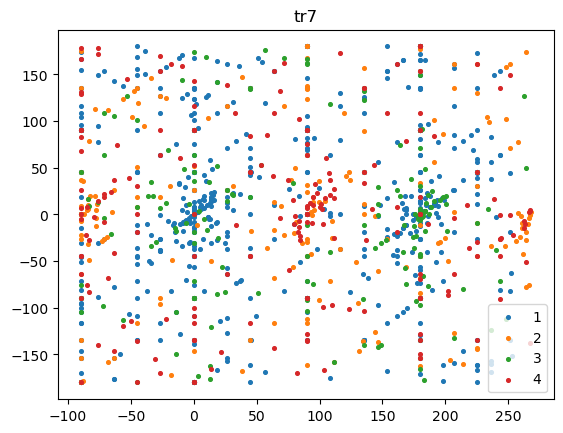

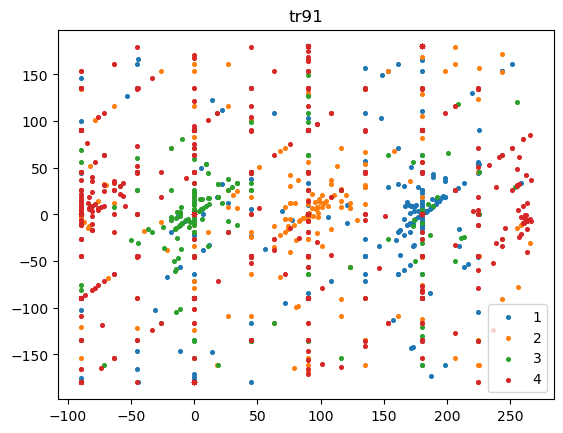

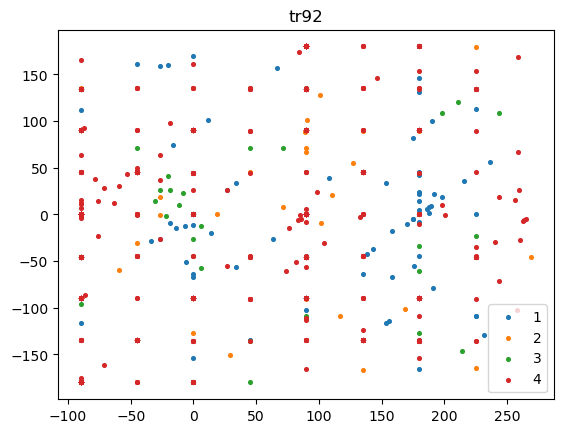

In [90]:
#все дфс степ
for i in dfs_step:
    plt.figure()
    plt.scatter(DfsStep1[i]['angles'], DfsStep1[i]['delta_angle'], s=7, label = '1')
    plt.scatter(DfsStep2[i]['angles'], DfsStep2[i]['delta_angle'],s=7, label='2')
    plt.scatter(DfsStep3[i]['angles'], DfsStep3[i]['delta_angle'],s=7, label='3')
    plt.scatter(DfsStep4[i]['angles'], DfsStep4[i]['delta_angle'],s=7, label='4')
    #DfsStep1[i].plot.scatter(x='angles',y='delta_angle', c='darkblue')
    #DfsStep2[i].plot.scatter(x='angles',y='delta_angle', c='darkmagenta')
    #DfsStep3[i].plot.scatter(x='angles',y='delta_angle', c='darkred')
    #DfsStep4[i].plot.scatter(x='angles',y='delta_angle', c='darkgoldenrod')
    plt.title(i)
    plt.legend()
    plt.show()

##### посчитаем сколько значений в 1,3 и 2,4 зонах, в которых угол в окрестностях таргетных углов (параллельных стене) и остальных углов (не параллельных стене) - НЕ нужно для построения распределения

In [91]:
#в скольких точек угол мыши параллелен стене +- 25 градусов
for i in DfsStep13:
    kk = DfsStep13[i].loc[((DfsStep13[i]['angles']>=-25) & (DfsStep13[i]['angles']<=25)) | ((DfsStep13[i]['angles']>=155) & (DfsStep13[i]['angles']<=205))]  
    print(i)
    print(len(kk))

tr1
523
tr2
390
tr3
155
tr4
73
tr5
267
tr6
233
tr7
426
tr91
364
tr92
80


In [92]:
#в скольких точек угол мыши НЕ параллелен стене (+- 25 градусов)
for i in DfsStep13:
    kk = DfsStep13[i].loc[(DfsStep13[i]['angles']<-25) | ((DfsStep13[i]['angles']<155) & (DfsStep13[i]['angles']>25)) | (DfsStep13[i]['angles']>205)]  
    print(i)
    print(len(kk))

tr1
409
tr2
372
tr3
197
tr4
62
tr5
145
tr6
205
tr7
429
tr91
225
tr92
65


In [93]:
del DfsStep24['tr92']

In [94]:
#parallel
for i in DfsStep24:
    kk = DfsStep24[i].loc[(DfsStep24[i]['angles']<=-65) | ((DfsStep24[i]['angles']>=65) & (DfsStep24[i]['angles']<=115)) | (DfsStep24[i]['angles']>=245)]  
    print(i)
    print(len(kk))

tr1
271
tr2
287
tr3
199
tr4
82
tr5
278
tr6
425
tr7
213
tr91
452


In [95]:
#regular
for i in DfsStep24:
    kk = DfsStep24[i].loc[((DfsStep24[i]['angles']>-65) & (DfsStep24[i]['angles']<65)) | ((DfsStep24[i]['angles']>115) & (DfsStep24[i]['angles']<245))]  
    print(i)
    print(len(kk))

tr1
257
tr2
344
tr3
261
tr4
53
tr5
152
tr6
504
tr7
224
tr91
891


### соберем нужные условия и сделаем общий scatter plot (все мыши в 1 таблице) для 13 паралл, 13 рег, 24 пар, 24 рег. 13 парал = значит точки, находящиеся в зонах 1 и 3, в которых значения угла мыши +- параллельны стене, и тд. НУЖНО для построения распределения (нужны dfPar24 и тд)

In [96]:
#for 13
par13 = []
l = 233
for i in DfsStep13:
    kk = DfsStep13[i].loc[((DfsStep13[i]['angles']>=-25) & (DfsStep13[i]['angles']<=25)) | ((DfsStep13[i]['angles']>=155) & (DfsStep13[i]['angles']<=205))]
    if len(kk) > l:
        kk = kk.iloc[0:l]
    print(len(kk))
    par13.append(kk)
dfPar13 = pd.concat(par13)

#for 13
reg13 = []
l = 197
for i in DfsStep13:
    kk = DfsStep13[i].loc[(DfsStep13[i]['angles']<-25) | ((DfsStep13[i]['angles']<155) & (DfsStep13[i]['angles']>25)) | (DfsStep13[i]['angles']>205)] 
    if len(kk) > l:
        kk = kk.iloc[0:l]
    print(len(kk))
    reg13.append(kk)
dfReg13 = pd.concat(reg13)


233
233
155
73
233
233
233
233
80
197
197
197
62
145
197
197
197
65


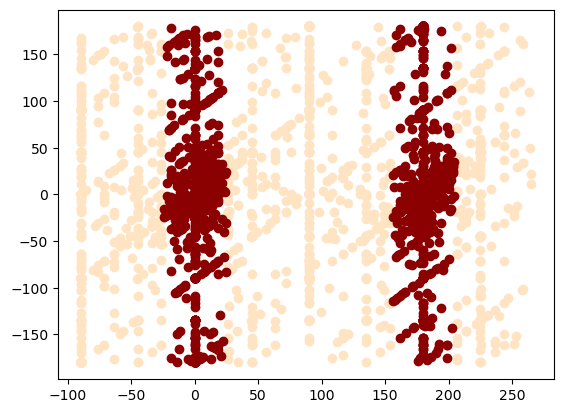

In [97]:
plt.scatter(dfReg13['angles'], dfReg13['delta_angle'], color='bisque')
plt.scatter(dfPar13['angles'], dfPar13['delta_angle'], color='darkred')

In [98]:
#for 24
par24 = []
l = 213
for i in DfsStep24:
    kk = DfsStep24[i].loc[(DfsStep24[i]['angles']<=-65) | ((DfsStep24[i]['angles']>=65) & (DfsStep24[i]['angles']<=115)) | (DfsStep24[i]['angles']>=245)]  
    if len(kk) > l:
        kk = kk.iloc[0:l]
    print(len(kk))
    par24.append(kk)
dfPar24 = pd.concat(par24)

#for 24
reg24 = []
l = 200
for i in DfsStep24:
    kk = DfsStep24[i].loc[((DfsStep24[i]['angles']>-65) & (DfsStep24[i]['angles']<65)) | ((DfsStep24[i]['angles']>115) & (DfsStep24[i]['angles']<245))]  
    if len(kk) > l:
        kk = kk.iloc[0:l]
    print(len(kk))
    reg24.append(kk)
dfReg24 = pd.concat(reg24)


213
213
199
82
213
213
213
213
200
200
200
53
152
200
200
200


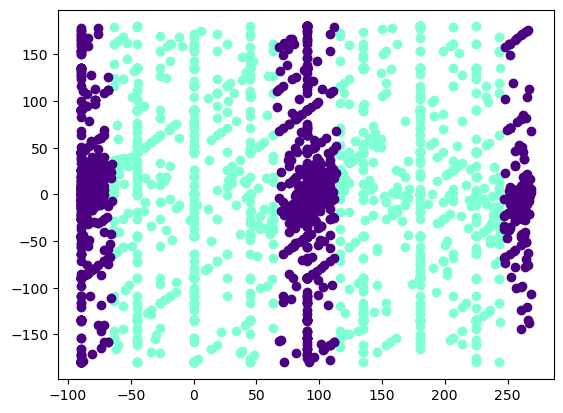

In [99]:
plt.scatter(dfReg24['angles'], dfReg24['delta_angle'], color='aquamarine')
plt.scatter(dfPar24['angles'], dfPar24['delta_angle'], color='indigo')

### мы тут смотрим общие (для всех мышей) распределения изменения углов в зонах рядом со стенами (в зонах 1 и 3; 2 и 4) отдельно для углов +- параллельных стене и нет. сравниваем распределения

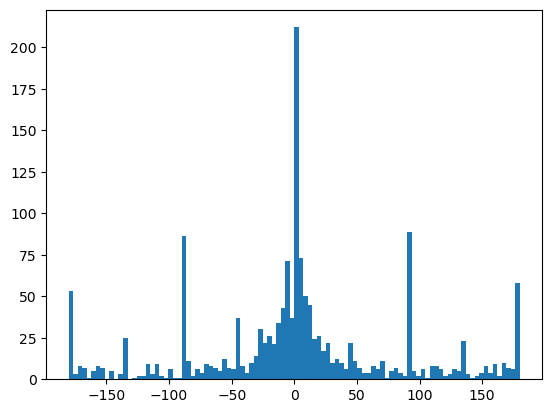

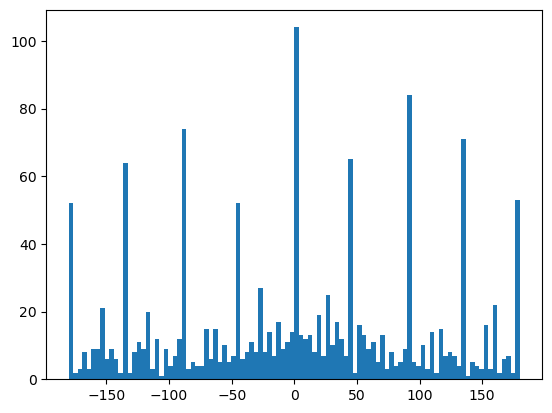

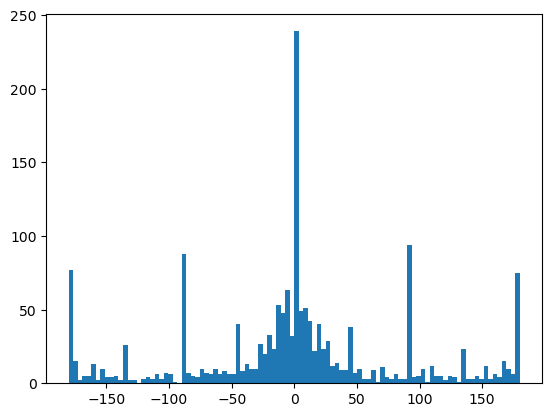

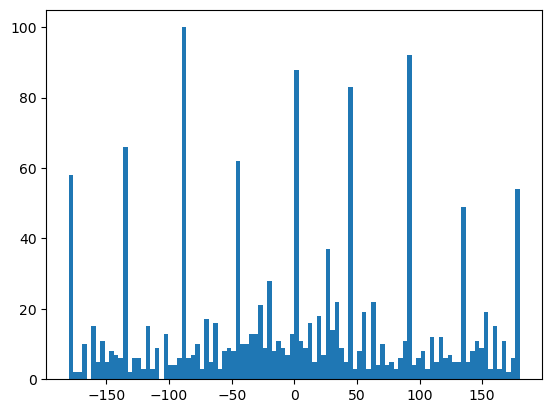

In [100]:
#this cell is okay

wall_hist = {}
plt.figure()
y, binEdges, _ = plt.hist(dfPar24['delta_angle'], 100)
plt.show()
x = 0.5 * (binEdges[1:] + binEdges[:-1])
wall_hist['par24'] = [x, y]

plt.figure()
y, binEdges, _ = plt.hist(dfReg24['delta_angle'], 100)
plt.show()
x = 0.5 * (binEdges[1:] + binEdges[:-1])
wall_hist['reg24'] = [x, y]

plt.figure()
y, binEdges, _ = plt.hist(dfPar13['delta_angle'], 100)
plt.show()
x = 0.5 * (binEdges[1:] + binEdges[:-1])
wall_hist['par13'] = [x, y]

plt.figure()
y, binEdges, _ = plt.hist(dfReg13['delta_angle'], 100)
plt.show()
x = 0.5 * (binEdges[1:] + binEdges[:-1])
wall_hist['reg13'] = [x, y]


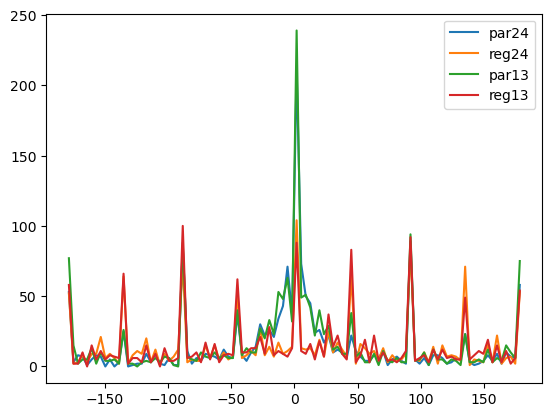

In [101]:
for i in wall_hist:
    plt.plot(wall_hist[i][0], wall_hist[i][1], label=i)
plt.legend()

In [102]:
wall_hist

{'par24': [array([-178.2, -174.6, -171. , -167.4, -163.8, -160.2, -156.6, -153. ,
         -149.4, -145.8, -142.2, -138.6, -135. , -131.4, -127.8, -124.2,
         -120.6, -117. , -113.4, -109.8, -106.2, -102.6,  -99. ,  -95.4,
          -91.8,  -88.2,  -84.6,  -81. ,  -77.4,  -73.8,  -70.2,  -66.6,
          -63. ,  -59.4,  -55.8,  -52.2,  -48.6,  -45. ,  -41.4,  -37.8,
          -34.2,  -30.6,  -27. ,  -23.4,  -19.8,  -16.2,  -12.6,   -9. ,
           -5.4,   -1.8,    1.8,    5.4,    9. ,   12.6,   16.2,   19.8,
           23.4,   27. ,   30.6,   34.2,   37.8,   41.4,   45. ,   48.6,
           52.2,   55.8,   59.4,   63. ,   66.6,   70.2,   73.8,   77.4,
           81. ,   84.6,   88.2,   91.8,   95.4,   99. ,  102.6,  106.2,
          109.8,  113.4,  117. ,  120.6,  124.2,  127.8,  131.4,  135. ,
          138.6,  142.2,  145.8,  149.4,  153. ,  156.6,  160.2,  163.8,
          167.4,  171. ,  174.6,  178.2]),
  array([ 53.,   3.,   8.,   7.,   1.,   5.,   8.,   7.,   0.,   5.,   0

In [103]:
import pickle
with open('angWallsDistr.pkl', 'wb') as fp:
    pickle.dump(wall_hist, fp)

### all_hist словарь с гистограммами распределений изменения углов для каждой зоны для каждой мыши

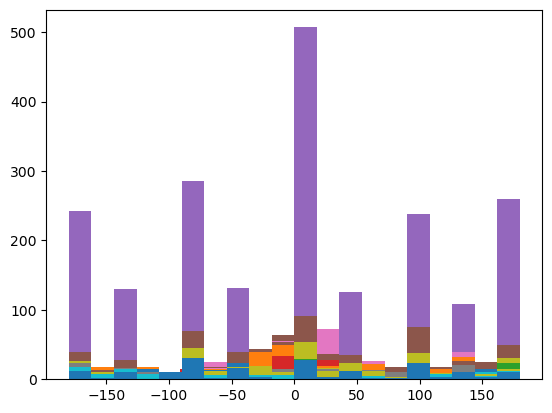

In [104]:
all_hist = {}
for numb in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
    all_hist[str(numb)] = {}
    for na in names:
        dffor1line = dfs_step[na].loc[dfs_step[na]['near_wall'] == numb]
        y, binEdges, _ = plt.hist(dffor1line['delta_angle'], 20)
        x = 0.5 * (binEdges[1:] + binEdges[:-1])
        all_hist[str(numb)][na] = [x, y]

In [105]:
all_hist

{'0': {'tr1': [array([-171., -153., -135., -117.,  -99.,  -81.,  -63.,  -45.,  -27.,
            -9.,    9.,   27.,   45.,   63.,   81.,   99.,  117.,  135.,
           153.,  171.]),
   array([13., 11., 19., 13.,  4., 34., 17., 32., 42., 50., 76., 55., 44.,
          15.,  7., 29.,  5., 14., 18., 18.])],
  'tr2': [array([-171., -153., -135., -117.,  -99.,  -81.,  -63.,  -45.,  -27.,
            -9.,    9.,   27.,   45.,   63.,   81.,   99.,  117.,  135.,
           153.,  171.]),
   array([17.,  3., 13.,  3.,  1., 36.,  3., 19., 22., 31., 62., 25., 29.,
          12.,  5., 27.,  6., 19.,  5., 20.])],
  'tr3': [array([-171., -153., -135., -117.,  -99.,  -81.,  -63.,  -45.,  -27.,
            -9.,    9.,   27.,   45.,   63.,   81.,   99.,  117.,  135.,
           153.,  171.]),
   array([ 4.,  9.,  6., 12.,  6.,  9., 11., 11., 25., 40., 41., 20., 17.,
          10.,  5., 10., 15.,  6., 11., 13.])],
  'tr4': [array([-171., -153., -135., -117.,  -99.,  -81.,  -63.,  -45.,  -27.,
         

pwd
C:\\Users\\Lenovo\\1navigation\\angles_hist\\all_angles\\

### cтроим гистограммы для изменения углов. каждый график - распределения изменения углов разных мышей в 1 и той же зоне поля

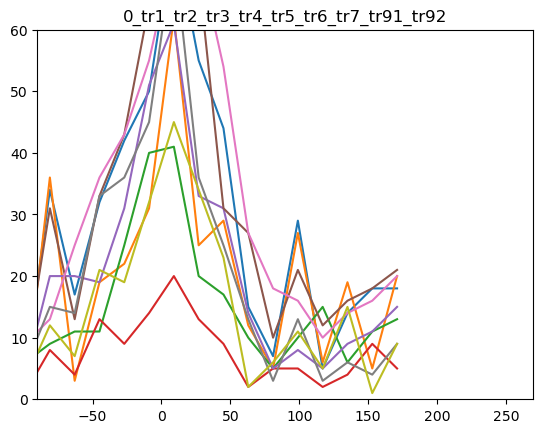

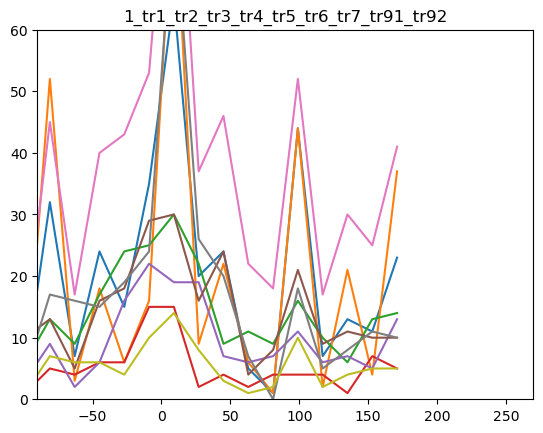

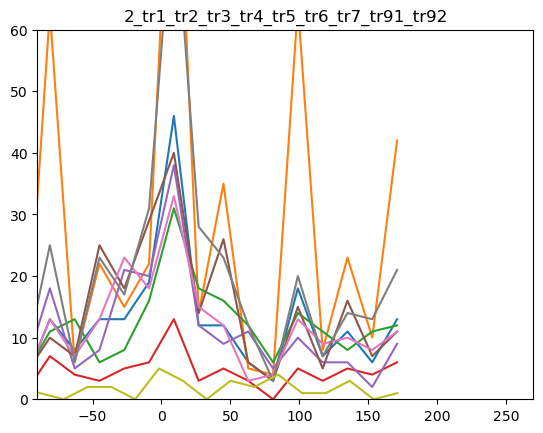

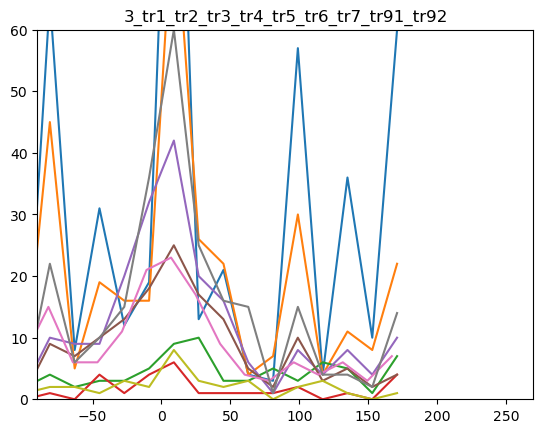

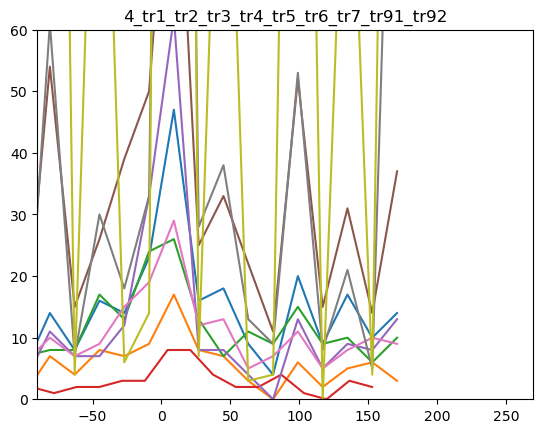

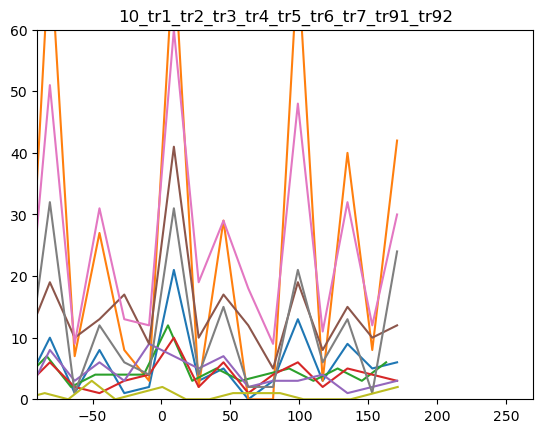

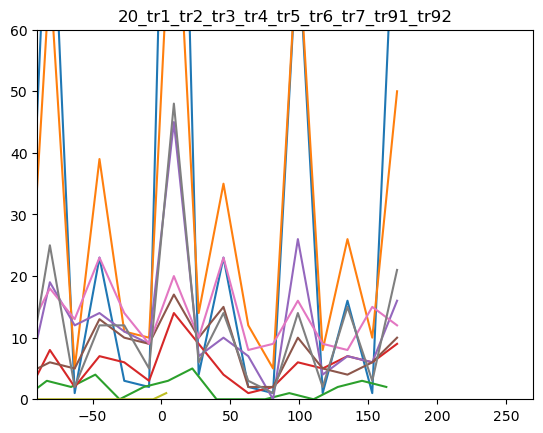

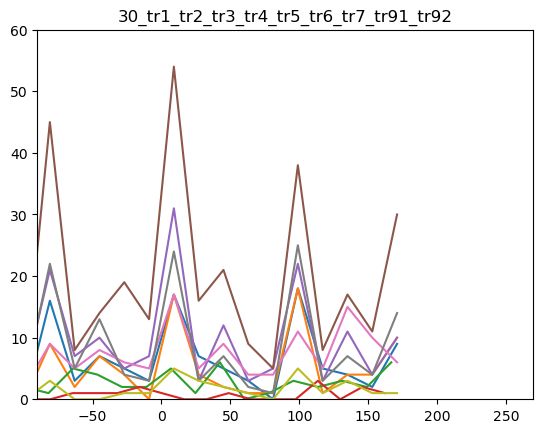

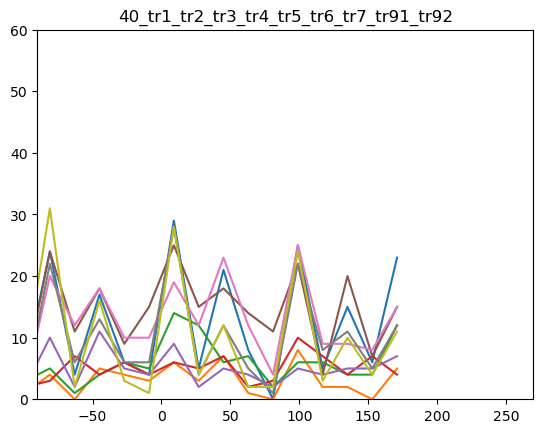

In [106]:
for i in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
    plt.figure()
    ax = plt.gca()
    ax.set_xlim([-90, 270])
    ax.set_ylim([0, 60])
    tit = str(i)
    for na in names:
        plt.plot(all_hist[str(i)][na][0], all_hist[str(i)][na][1])
        tit = tit + '_' + na
    plt.title(tit)
    #plt.savefig('C:\\Users\\Lenovo\\1navigation\\angles_hist\\delta_ang\\'+tit)
    plt.show()

#нарисуем то же распледеление но пусть по y будет корень из прошлого y
for i in [10, 20, 30, 40]:
    plt.figure()
    tit = str(i) + '_sqrt'
    for na in names:
        all_hist[str(i)][na][1] = np.sqrt(all_hist[str(i)][na][1])
        plt.plot(all_hist[str(i)][na][0], all_hist[str(i)][na][1])
        tit = tit + '_' + na
    plt.title(tit)
    plt.show()

In [107]:
dfs_step

{'tr1':           time       x       y      angles  delta_angle  near_wall  \
 0        1.068  -2.603  33.969  -63.434949     0.000000          0   
 1        1.602   0.911  33.188   -9.450425    53.984524          0   
 2        2.202   3.904  32.928    0.000000     9.450425          0   
 3        2.703   2.213  33.448  135.000000   135.000000          0   
 4        3.203   1.171  32.668  -68.198591   156.801409          0   
 ...        ...     ...     ...         ...          ...        ...   
 3044  1751.817  43.860 -45.943  -90.000000   -90.000000         20   
 3045  1752.317  43.730 -45.943  180.000000   -90.000000         20   
 3046  1753.285  43.730 -45.943  180.000000     0.000000         20   
 3047  1753.819  43.991 -45.943    0.000000  -180.000000         20   
 3048  1754.319  43.860 -45.943  180.000000   180.000000         20   
 
       step_length  
 0        0.000000  
 1        3.599744  
 2        3.004272  
 3        1.769147  
 4        1.301601  
 ...         

for i in [10, 20, 30, 40]:
    print(i)
    tit = str(i) + '_sqrt'
    for na in names:
        print(all_hist[str(i)][na][0])
        

### возьмем от каждой мыши (в каждой зоне) одинаковое количество точек. но от некоторых мышей выйдет чуть меньше точек, чем от большинства. создадим словари с полученными обрезанными таблицами dict0, dict1 и тд

In [108]:
for i in dfs_step:
    for n in [0, 1, 2, 3, 4, 10, 20, 30, 40]:
        print(i + ' ' + str(n))
        print(len(dfs_step[i].loc[dfs_step[i]['near_wall'] == n]))

tr1 0
516
tr1 1
389
tr1 2
247
tr1 3
543
tr1 4
281
tr1 10
106
tr1 20
610
tr1 30
127
tr1 40
230
tr2 0
358
tr2 1
391
tr2 2
519
tr2 3
371
tr2 4
112
tr2 10
459
tr2 20
552
tr2 30
107
tr2 40
58
tr3 0
281
tr3 1
267
tr3 2
237
tr3 3
85
tr3 4
223
tr3 10
87
tr3 20
35
tr3 30
49
tr3 40
120
tr4 0
149
tr4 1
105
tr4 2
83
tr4 3
30
tr4 4
52
tr4 10
72
tr4 20
108
tr4 30
16
tr4 40
99
tr5 0
379
tr5 1
185
tr5 2
202
tr5 3
227
tr5 4
228
tr5 10
90
tr5 20
228
tr5 30
182
tr5 40
102
tr6 0
576
tr6 1
274
tr6 2
288
tr6 3
164
tr6 4
641
tr6 10
272
tr6 20
155
tr6 30
372
tr6 40
290
tr7 0
558
tr7 1
690
tr7 2
228
tr7 3
165
tr7 4
209
tr7 10
484
tr7 20
267
tr7 30
155
tr7 40
249
tr91 0
370
tr91 1
316
tr91 2
375
tr91 3
273
tr91 4
968
tr91 10
217
tr91 20
218
tr91 30
165
tr91 40
210
tr92 0
281
tr92 1
102
tr92 2
34
tr92 3
43
tr92 4
2086
tr92 10
14
tr92 20
2
tr92 30
33
tr92 40
184


In [109]:
def makeDictCutDfsSteps(dictN, n1, l):
    for i in dfs_step:
        print(i + ' ' + str(n1))
        k = dfs_step[i].loc[dfs_step[i]['near_wall'] == n1]
        print(len(k))
        if len(k > l):
            k = k.iloc[0:l]
        print(len(k))
        dictN[i] = k

In [110]:
dict10 = {}
makeDictCutDfsSteps(dict10, 10, 90)
dict20 = {}
makeDictCutDfsSteps(dict20, 20, 108)
dict30 = {}
makeDictCutDfsSteps(dict30, 30, 107)
dict40 = {}
makeDictCutDfsSteps(dict40, 40, 102)

tr1 10
106
90
tr2 10
459
90
tr3 10
87
87
tr4 10
72
72
tr5 10
90
90
tr6 10
272
90
tr7 10
484
90
tr91 10
217
90
tr92 10
14
14
tr1 20
610
108
tr2 20
552
108
tr3 20
35
35
tr4 20
108
108
tr5 20
228
108
tr6 20
155
108
tr7 20
267
108
tr91 20
218
108
tr92 20
2
2
tr1 30
127
107
tr2 30
107
107
tr3 30
49
49
tr4 30
16
16
tr5 30
182
107
tr6 30
372
107
tr7 30
155
107
tr91 30
165
107
tr92 30
33
33
tr1 40
230
102
tr2 40
58
58
tr3 40
120
102
tr4 40
99
99
tr5 40
102
102
tr6 40
290
102
tr7 40
249
102
tr91 40
210
102
tr92 40
184
102


In [111]:
dict0 = {}
makeDictCutDfsSteps(dict0, 0, 281)
dict1 = {}
makeDictCutDfsSteps(dict1, 1, 200)
dict2 = {}
makeDictCutDfsSteps(dict2, 2, 202)
dict3 = {}
makeDictCutDfsSteps(dict3, 3, 164)
dict4 = {}
makeDictCutDfsSteps(dict4, 4, 209)

tr1 0
516
281
tr2 0
358
281
tr3 0
281
281
tr4 0
149
149
tr5 0
379
281
tr6 0
576
281
tr7 0
558
281
tr91 0
370
281
tr92 0
281
281
tr1 1
389
200
tr2 1
391
200
tr3 1
267
200
tr4 1
105
105
tr5 1
185
185
tr6 1
274
200
tr7 1
690
200
tr91 1
316
200
tr92 1
102
102
tr1 2
247
202
tr2 2
519
202
tr3 2
237
202
tr4 2
83
83
tr5 2
202
202
tr6 2
288
202
tr7 2
228
202
tr91 2
375
202
tr92 2
34
34
tr1 3
543
164
tr2 3
371
164
tr3 3
85
85
tr4 3
30
30
tr5 3
227
164
tr6 3
164
164
tr7 3
165
164
tr91 3
273
164
tr92 3
43
43
tr1 4
281
209
tr2 4
112
112
tr3 4
223
209
tr4 4
52
52
tr5 4
228
209
tr6 4
641
209
tr7 4
209
209
tr91 4
968
209
tr92 4
2086
209


In [112]:
dict10

{'tr1':           time       x       y      angles  delta_angle  near_wall  \
 23      12.946  38.785  43.340    0.000000     0.000000         10   
 24      13.447  37.743  43.600  -90.000000   -90.000000         10   
 25      14.047  39.175  44.381  180.000000   -90.000000         10   
 26      14.548  37.223  44.251  180.000000     0.000000         10   
 27      15.048  37.483  42.819  -45.000000   135.000000         10   
 ...        ...     ...     ...         ...          ...        ...   
 2793  1604.403  40.737  40.216   90.000000    90.000000         10   
 2794  1604.903  42.559  43.860  180.000000    90.000000         10   
 2795  1605.404  42.949  44.121   90.000000   -90.000000         10   
 2796  1605.904  43.730  44.771   45.000000   -45.000000         10   
 2797  1606.405  43.079  44.251  206.477174   161.477174         10   
 
       step_length  
 23       6.638000  
 24       1.073948  
 25       1.631130  
 26       1.956324  
 27       1.455412  
 ...         

##### делаем df для каждой зоны - берем значения от всех мышей (примерно одинаокове количество значений от каждой мыши)

In [113]:
def makeMergDf(dictN):
    listN = []
    for i in dictN:
        listN.append(dictN[i]['delta_angle'])
    dfN = pd.concat(listN)
    dfN = dfN.reset_index()
    dfN = dfN.drop(['index'], axis=1)
    return dfN

In [114]:
df10 = makeMergDf(dict10)
df10

delta_angle
0       0.000000
1     -90.000000
2     -90.000000
3       0.000000
4     135.000000
..           ...
708   -14.080564
709    61.899101
710   -56.305588
711    60.111663
712     0.000000

[713 rows x 1 columns]

In [115]:
df20 = makeMergDf(dict20)
df30 = makeMergDf(dict30)
df40 = makeMergDf(dict40)
df0 = makeMergDf(dict0)
df1 = makeMergDf(dict1)
df2 = makeMergDf(dict2)
df3 = makeMergDf(dict3)
df4 = makeMergDf(dict4)

### делаем слитную таблицу для каждого типа зоны (в углах, центре, у стен)

In [116]:
listCorn = []
for i in dict10:
    listCorn.append(dict10[i]['delta_angle'])
for i in dict20:
    listCorn.append(dict20[i]['delta_angle'])
for i in dict30:
    listCorn.append(dict30[i]['delta_angle'])
for i in dict40:
    listCorn.append(dict40[i]['delta_angle'])
dfCorn = pd.concat(listCorn)
dfCorn = dfCorn.reset_index()
dfCorn = dfCorn.drop(['index'], axis=1)

In [117]:
listWall = []
for i in dict1:
    listWall.append(dict1[i]['delta_angle'])
for i in dict2:
    listWall.append(dict2[i]['delta_angle'])
for i in dict3:
    listWall.append(dict3[i]['delta_angle'])
for i in dict4:
    listWall.append(dict4[i]['delta_angle'])
dfWall = pd.concat(listWall)
dfWall = dfWall.reset_index()
dfWall = dfWall.drop(['index'], axis=1)

In [118]:
listWall = []
for i in dict1:
    listWall.append(dict1[i]['delta_angle'])
for i in dict2:
    listWall.append(dict2[i]['delta_angle'])
for i in dict3:
    listWall.append(dict3[i]['delta_angle'])
for i in dict4:
    listWall.append(dict4[i]['delta_angle'])
dfWall = pd.concat(listWall)
dfWall = dfWall.reset_index()
dfWall = dfWall.drop(['index'], axis=1)

### теперь сделаны df по которым и надо построить итоговые усредненные гистограммы

In [119]:
mergDfs = {'10':df10, '20':df20, '30':df30, '40':df40, '0':df0, '1':df1, '2':df2, '3':df3, '4':df4, 'corn': dfCorn, 'wall':dfWall}

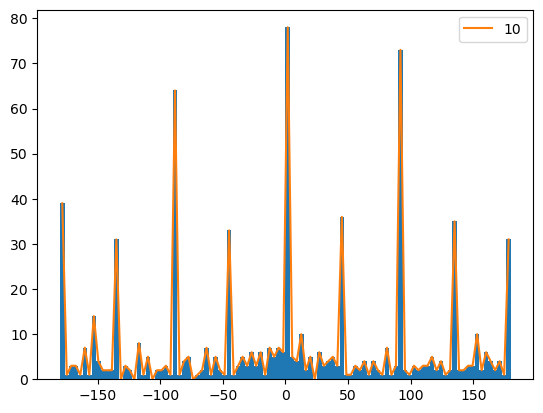

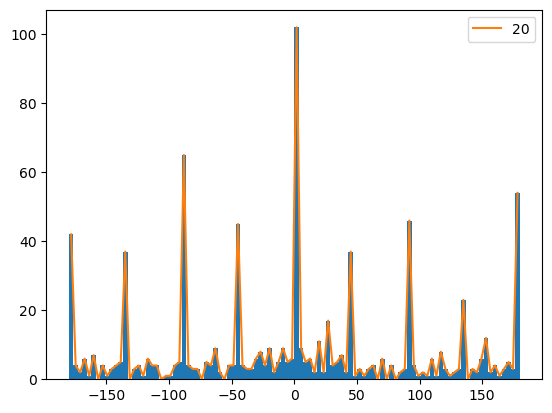

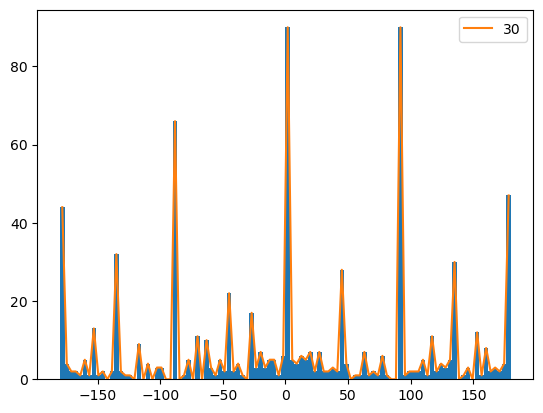

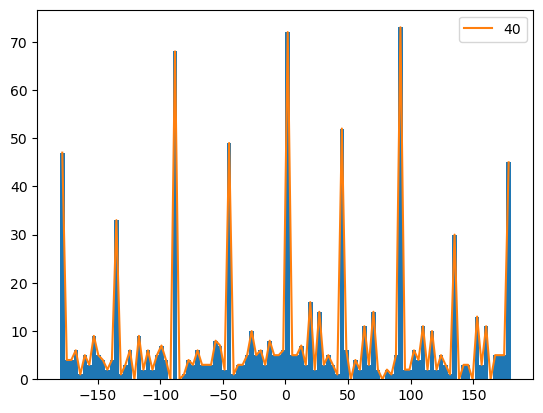

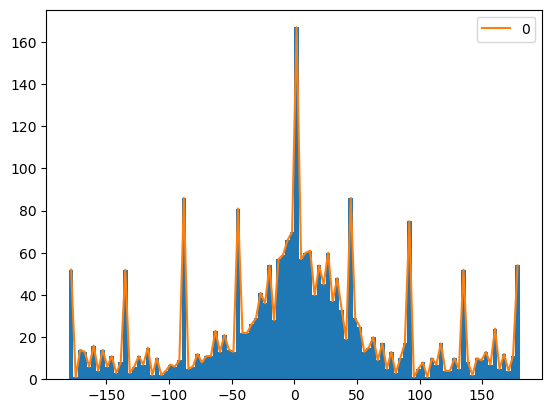

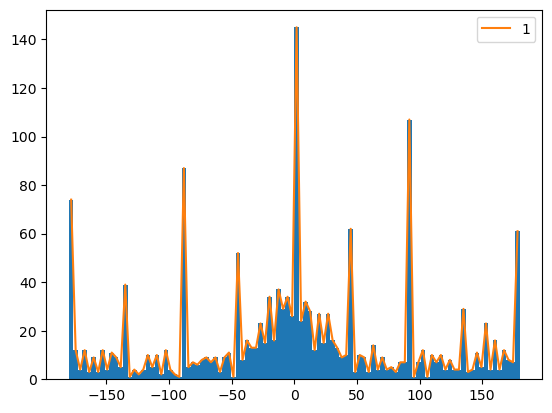

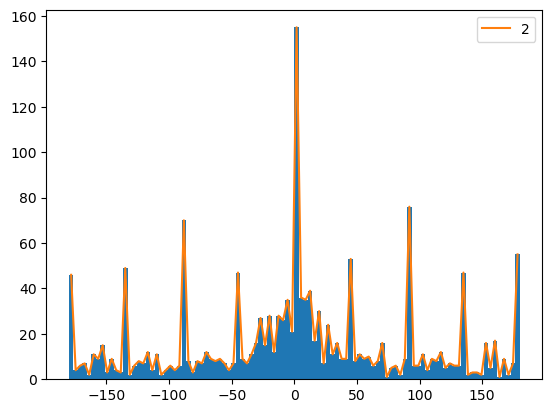

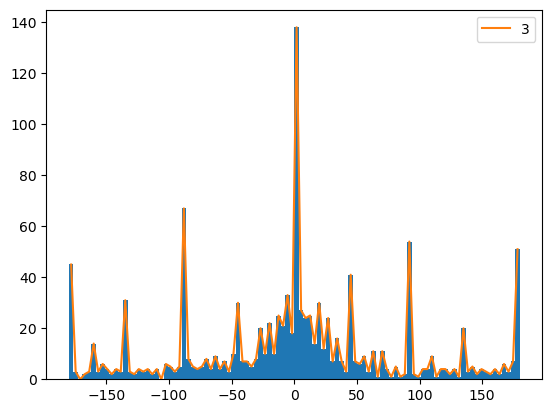

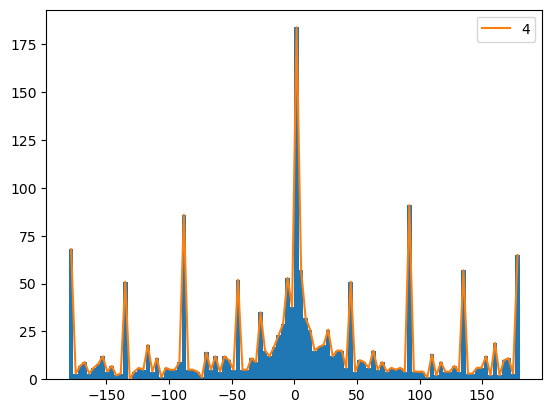

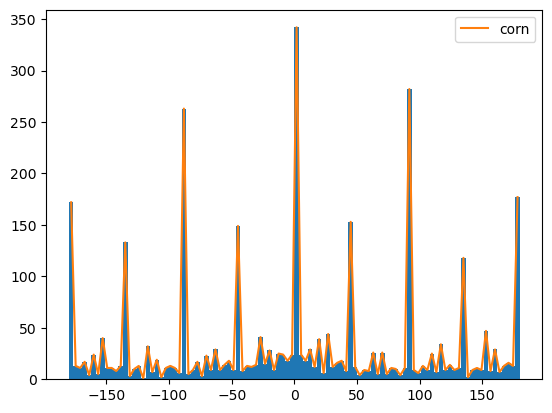

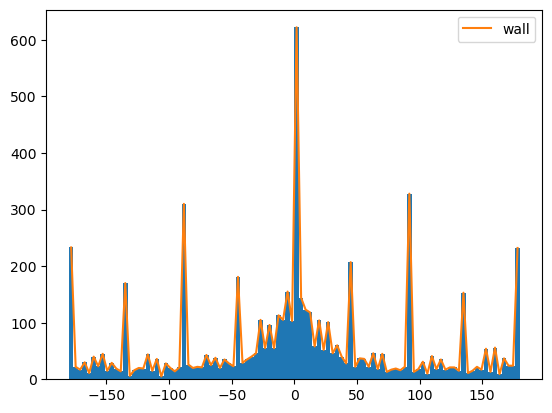

In [120]:
mergPlots = {}
for i in mergDfs:
    y, binEdges, _ = plt.hist(mergDfs[i], 100)
    x = 0.5 * (binEdges[1:] + binEdges[:-1])
    mergPlots[i]  = [x, y]
    plt.plot(x, y, label=i)
    plt.legend()
    plt.show()

In [121]:
%matplotlib inline

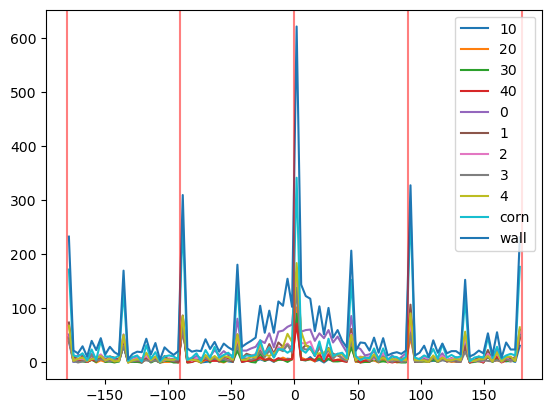

In [122]:
for i in mergPlots:
    x = mergPlots[i][0]
    y = mergPlots[i][1]
    plt.plot(x, y, label=i)
plt.legend()
plt.axvline(x=0, c='red', alpha=0.5)
plt.axvline(x=90, c='red', alpha=0.5)
plt.axvline(x=180, c='red', alpha=0.5)
#plt.axvline(x=270, c='red', alpha=0.5)
#plt.axvline(x=360, c='red', alpha=0.5)
plt.axvline(x=-90, c='red', alpha=0.5)
plt.axvline(x=-180, c='red', alpha=0.5)
#plt.axvline(x=-270, c='red', alpha=0.5)
#plt.axvline(x=-360, c='red', alpha=0.5)

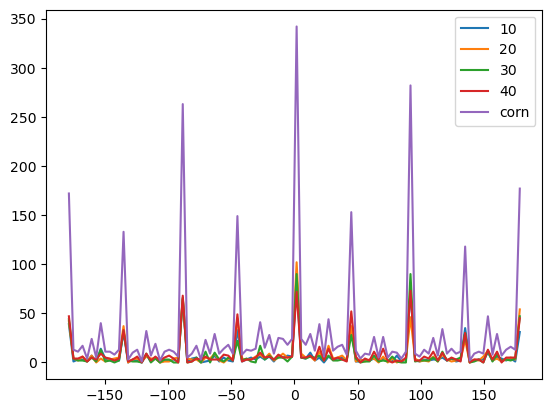

In [123]:
for i in ['10', '20', '30', '40', 'corn']:
    x = mergPlots[i][0]
    y = mergPlots[i][1]
    plt.plot(x, y, label=i)
plt.legend()

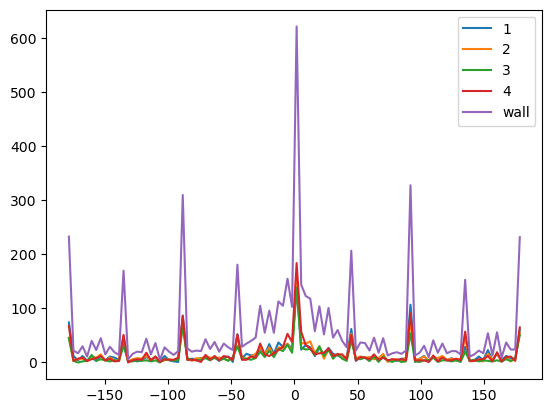

In [124]:
for i in ['1', '2', '3', '4', 'wall']:
    x = mergPlots[i][0]
    y = mergPlots[i][1]
    plt.plot(x, y, label=i)
plt.legend()

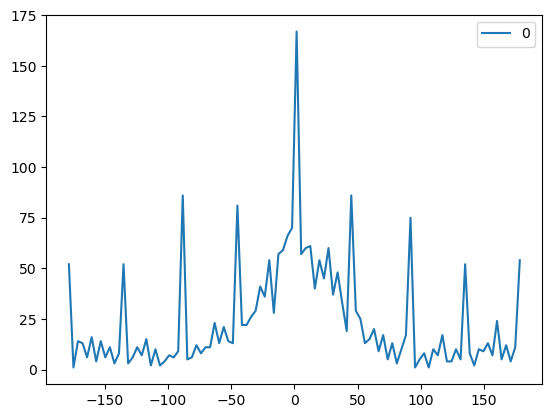

In [125]:
for i in ['0']:
    x = mergPlots[i][0]
    y = mergPlots[i][1]
    plt.plot(x, y, label=i)
plt.legend()

##### надо нормализовать от 0 до 1 все эти графики

In [126]:
def minMaxOfY(y):
    yn = (y - y.min()) / (y.max() - y.min())
    return yn

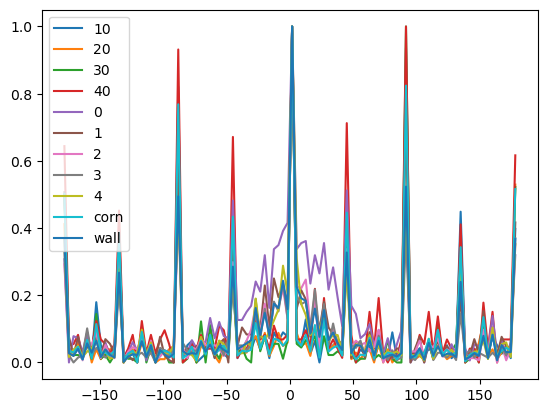

In [127]:
for i in mergPlots:
    mergPlots[i][1] = minMaxOfY(mergPlots[i][1])
    plt.plot(mergPlots[i][0], mergPlots[i][1], label=i)
plt.legend()

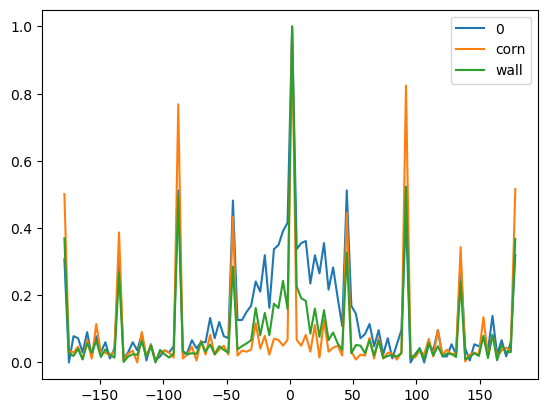

In [128]:
for i in ['0', 'corn', 'wall']:
    plt.plot(mergPlots[i][0], mergPlots[i][1], label=i)
plt.legend()
    

##### можно сохранить уусредненные распределения по центру, зоне у стен и зоне углов в словарь origDistr

In [129]:
origDistr = {}
for i in ['0', 'corn', 'wall']:
    origDistr[i] = mergPlots[i]

In [130]:
import pickle
with open('angOrigDistr.pkl', 'wb') as fp:
    pickle.dump(origDistr, fp)

for i in ['1','2','3','4','ang']:
    plt.plot(mergPlots[i][0], mergPlots[i][1], label=i)
plt.legend()

mi = y.min()
ma = y.max()
print(mi, ma)
yn = (y - y.min()) / (y.max() - y.min())
plt. plot(x, yn)

#### можно сгладить распределения по гаусу

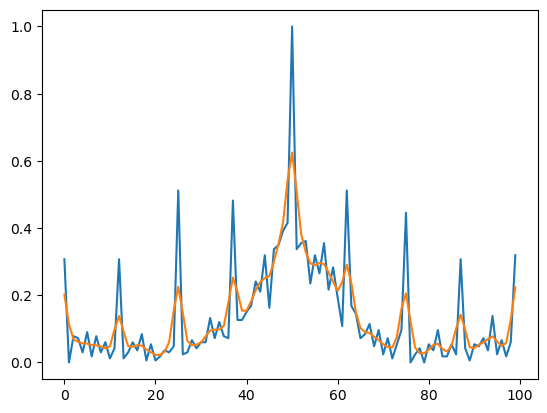

In [131]:
x = mergPlots['0'][1]
y3 = gaussian_filter1d(x, 1)
plt.plot(x)
plt.plot(y3)

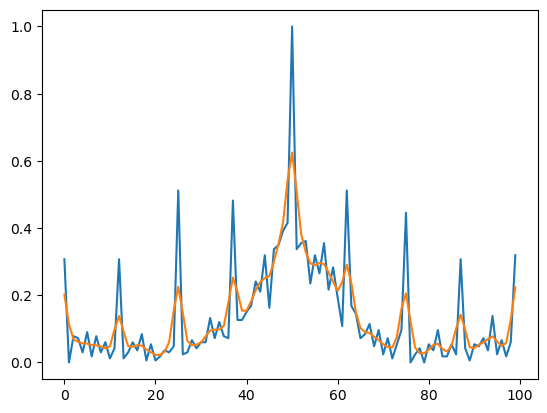

In [132]:
x = mergPlots['0'][1]
y3 = gaussian_filter1d(x, 1)
plt.plot(x)
plt.plot(y3)

### можно сгладить распределения с кернел денсити

from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#X = mergPlots['0'][1]
X = mergDfs['0'].to_numpy()
x = mergDfs['0'].to_numpy()
X

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


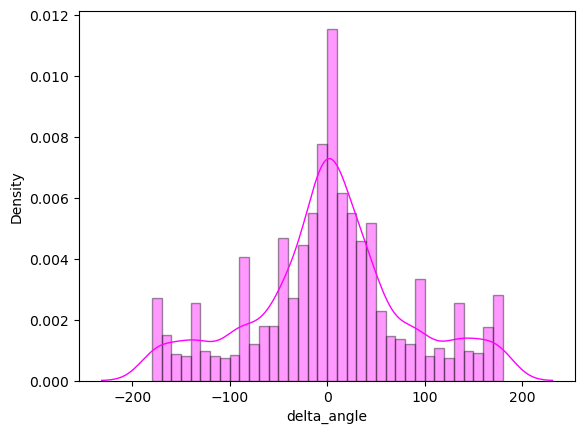

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


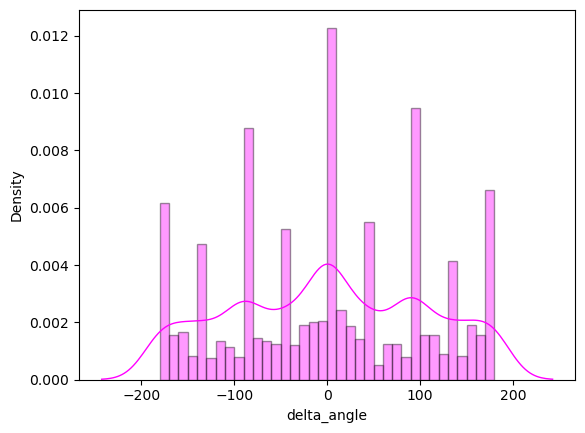

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\2467016934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


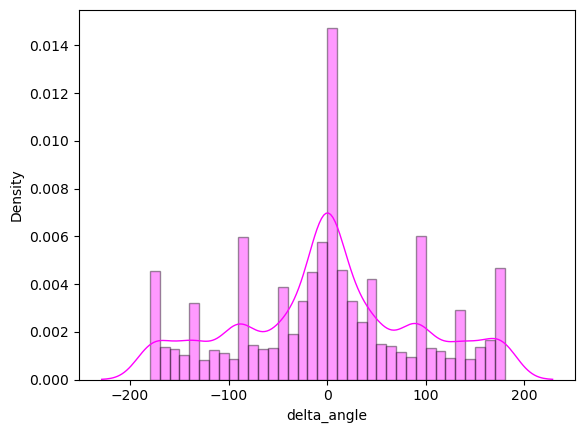

In [133]:
finalDistr = {}
for i in ['0', 'corn', 'wall']:
    k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
    plt.show()
    j = k.lines
    x = j[0]._xorig
    y = j[0]._yorig
    y = minMaxOfY(y)
    finalDistr[i] = [x, y]
    

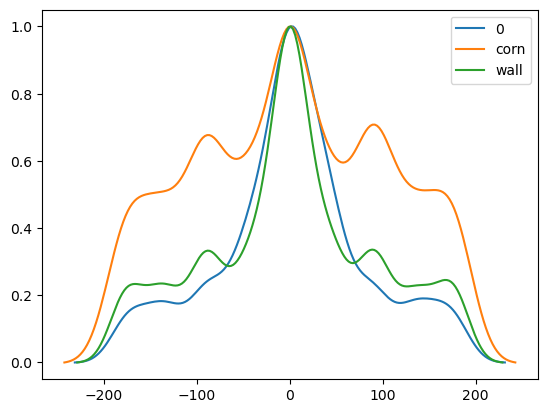

In [134]:
for i in finalDistr:
    plt.plot(finalDistr[i][0], finalDistr[i][1], label = i)
plt.legend()

In [135]:
import pickle
with open('angleDistr.pkl', 'wb') as fp:
    pickle.dump(finalDistr, fp)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


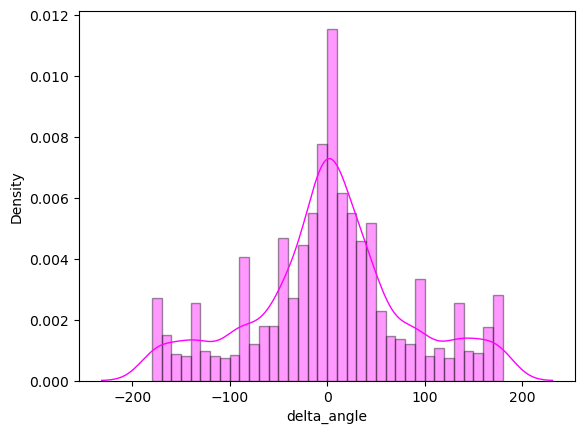

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


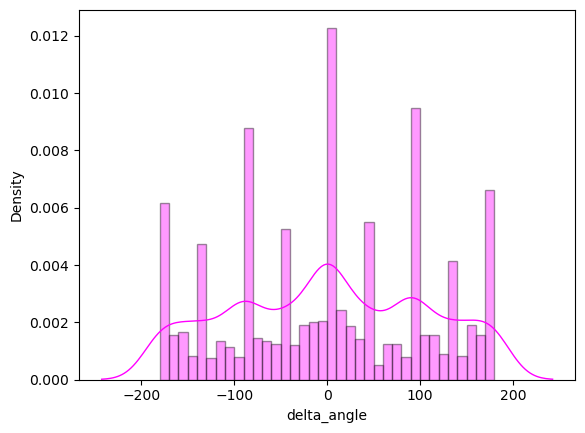

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15192\4250383979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})


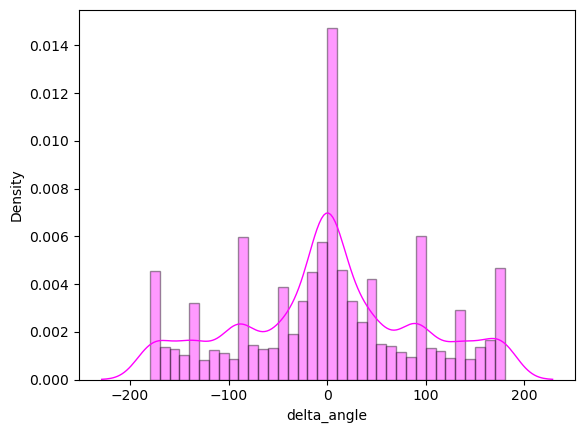

In [136]:
finalDistr = {}
for i in ['0', 'corn', 'wall']:
    k = sns.distplot(mergDfs[i]['delta_angle'], hist=True, kde=True, bins=int(180/5), color = 'magenta',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
    plt.show()
    j = k.lines
    x = j[0]._xorig
    y = j[0]._yorig
    y = minMaxOfY(y)
    finalDistr[i] = [x, y]

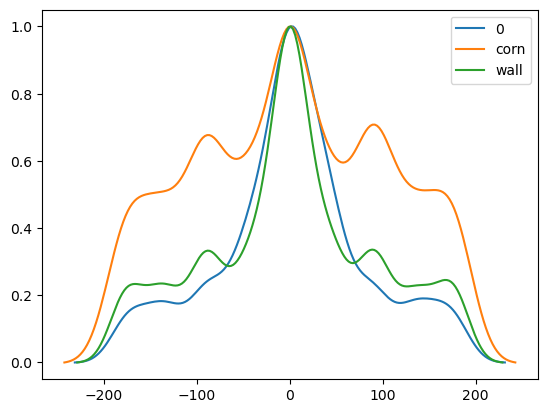

In [137]:
for i in finalDistr:
    plt.plot(finalDistr[i][0], finalDistr[i][1], label = i)
plt.legend()